# Customer Segmentation for E-Commerce Website

## Table of Contents

1. Problem Definition
2. Data Import and EDA
3. Machine Learning
4. Conclusion
5. Reference

## Report Summary

This project involves a comprehensive analysis of customer behavior during different time periods to identify the optimal business strategy. We examined the most active user groups and popular products and conducted an in-depth study of various brands to understand consumer interactions with them, including pricing and product categories.
Additionally, we utilized RFM segmentation to categorize customers and provide actionable insights for the company to act upon. To enhance the accuracy of our analysis, we leveraged machine learning algorithms to identify the key factors influencing customer purchase behavior and developed predictive models to anticipate their purchasing decisions.
Overall, this project provided a detailed understanding of customer behavior and preferences, enabling the e-commerce website to optimize its business operations and make data-driven decisions.

## 1.Problem Definition

The goal of this project is to identify customer segments with distinctive characteristics based on their behaviour and purchase history. These segments can be used to optimize marketing strategies, personalize the  shopping experience, and increase customer retention. Finally, we also aim to predict at time of addition to shopping cart if a user will purchase a given product or not.

### 1.1 Interest & Motivation

By understanding the unique needs and preferences of 
different customer segments, businesses can tailor their 
marketing efforts and product offerings to better meet 
customers’ needs. Additionally, effective customer 
segmentation can increase customer retention and loyalty, ultimately leading to an increase in sales and revenue.

### 1.2 Dataset Summary

Data has been collected by OpenCDP and is available from Oct'19-Apr'20 for a variety of gadgets and resources
https://rees46.com/en/datasets

### 1.2.1 Dataset Overview

This dataset contains behavior data for 7 months (from October 2019 to April 2020) from a large multi-category online store.

Each row in the file represents an event. All events are related to products and users. Each event is like many-to-many relation between products and users.

### 1.2.2 Column Exploration

column names           | description        | dtype | comment |
-----------------------|---------------------|-------|---------|
 event_time | When event happened | datetime | **object**
 event_type | Type of the event i.e. view, add to cart, purchase | string | **date**
 product_id | Unique Product ID | string | **numeric**
 category_id | Category ID of the product | string | **object**
 category_code | Name of the category if present | string | **object**
 brand | Brand of the product | string | **object**
 price | Price of the product sought | float | **numeric**
 user_id | Unique user id of each user| string | **object**
 user_session | Session ID of the user | string | **object**
 


## 2.Data Import and EDA

In [ ]:
data = "gs://ecommerce-team-8/notebooks/jupyter/"

In [ ]:
from pyspark.sql.types import StructField, StructType, StringType, LongType, IntegerType
ecom_oct = spark.read.format("csv")\
  .option("inferSchema", "true")\
  .option("header", "true")\
  .option("nullValue", "NA")\
  .load(data + "e-commerce/2019-Oct.csv")

In [ ]:
#import Nov data
from pyspark.sql.types import StructField, StructType, StringType, LongType, IntegerType
ecom_nov = spark.read.format("csv")\
  .option("inferSchema", "true")\
  .option("header", "true")\
  .option("nullValue", "NA")\
  .load(data + "e-commerce/2019-Nov.csv")

ecom_oct.printSchema()

#merge two months data

#ecom_oct = ecom_oct.unionAll(ecom_nov)

root
 |-- event_time: timestamp (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)



In [ ]:
ecom_oct.printSchema()

root
 |-- event_time: timestamp (nullable = true)
 |-- event_type: string (nullable = true)
 |-- product_id: integer (nullable = true)
 |-- category_id: long (nullable = true)
 |-- category_code: string (nullable = true)
 |-- brand: string (nullable = true)
 |-- price: double (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- user_session: string (nullable = true)



In [ ]:
ecom_oct.count()

42448764

In [ ]:
ecom_oct.show(5)

+-------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|         event_time|event_type|product_id|        category_id|       category_code|   brand|  price|  user_id|        user_session|
+-------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+
|2019-10-01 00:00:00|      view|  44600062|2103807459595387724|                null|shiseido|  35.79|541312140|72d76fde-8bb3-4e0...|
|2019-10-01 00:00:00|      view|   3900821|2053013552326770905|appliances.enviro...|    aqua|   33.2|554748717|9333dfbd-b87a-470...|
|2019-10-01 00:00:01|      view|  17200506|2053013559792632471|furniture.living_...|    null|  543.1|519107250|566511c2-e2e3-422...|
|2019-10-01 00:00:01|      view|   1307067|2053013558920217191|  computers.notebook|  lenovo| 251.74|550050854|7c90fc70-0e80-459...|
|2019-10-01 00:00:04|      view|   1004237|2053013555631882655|electr

In [ ]:
from pyspark.sql.functions import col, sum

# Assuming your DataFrame is named `df`
null_counts = ecom_oct.select([sum(col(c).isNull().cast("int")).alias(c) for c in ecom_oct.columns])

# Show the results
null_counts.show()


+----------+----------+----------+-----------+-------------+-------+-----+-------+------------+
|event_time|event_type|product_id|category_id|category_code|  brand|price|user_id|user_session|
+----------+----------+----------+-----------+-------------+-------+-----+-------+------------+
|         0|         0|         0|          0|     13515609|6113008|    0|      0|           2|
+----------+----------+----------+-----------+-------------+-------+-----+-------+------------+



In [ ]:
ecom_oct.describe().show()

+-------+----------+--------------------+--------------------+-------------------+--------+-----------------+-------------------+--------------------+
|summary|event_type|          product_id|         category_id|      category_code|   brand|            price|            user_id|        user_session|
+-------+----------+--------------------+--------------------+-------------------+--------+-----------------+-------------------+--------------------+
|  count|  42448764|            42448764|            42448764|           28933155|36335756|         42448764|           42448764|            42448762|
|   mean|      null|1.0549932375842676E7|2.057404237936260...|               null|     NaN|290.3236606848809|5.335371475081686E8|                null|
| stddev|      null|1.1881906970608136E7|1.843926466140411...|               null|     NaN|358.2691553394021|1.852373817465431E7|                null|
|    min|      cart|             1000978| 2053013552226107603|    accessories.bag|  a-case|   

In [ ]:
ecom_oct=ecom_oct.cache()

### 2.1Analyzing Customer Behavior

#### 2.1.1 Event type distribution

In [ ]:
#ecom_oct = ecom_oct.dropna(how='any')

In [ ]:
from pyspark.sql.functions import avg, desc, count

count_by_event_type = ecom_oct.groupBy("event_type") \
                             .agg(count("*").alias("count"))

count_by_event_type.show()

+----------+--------+
|event_type|   count|
+----------+--------+
|  purchase|  742849|
|      view|40779399|
|      cart|  926516|
+----------+--------+



([<matplotlib.patches.Wedge at 0x7fade1e7c0d0>,
 [Text(1.0983380266351888, 0.06044484466949563, 'purchase'),
  Text(-1.0998983798062085, 0.014951725642141044, 'view'),
  Text(1.097414974026748, -0.07536826110420951, 'cart')],
 [Text(0.5990934690737393, 0.03296991527427034, '1.7%'),
  Text(-0.5999445708033864, 0.008155486713895113, '96.1%'),
  Text(0.5985899858327716, -0.041109960602296096, '2.2%')])

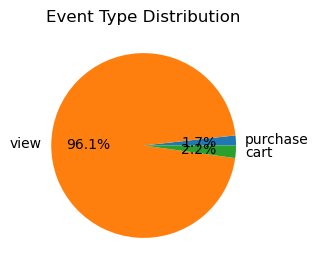

In [ ]:
import pandas as pd
import plotly.express as px
df2 = count_by_event_type.toPandas()

#fig2 = px.pie(df2, values='count', names='event_type', title='Distribution of Event Types')
#fig2.show()

fig, ax = plt.subplots()
plt.title('Event Type Distribution')
ax.pie(df2['count'], labels=df2['event_type'],autopct='%1.1f%%')

We observe that most of the consumers on an ecommerce website only view the product and very few add to cart or purchase the product. The goal of the company is to turn these cart event into purchase and view event into cart/purchase. As the view users are quite a few let's dive into the analytics of these users first and see their dynamics.

#### 2.1.2 The distribution of the users behavior throughout the day

In [ ]:
from pyspark.sql.functions import *
from pyspark.sql.functions import desc
ecom_hour_day= ecom_oct.filter(col("event_type").isNotNull() & col("event_time").isNotNull())

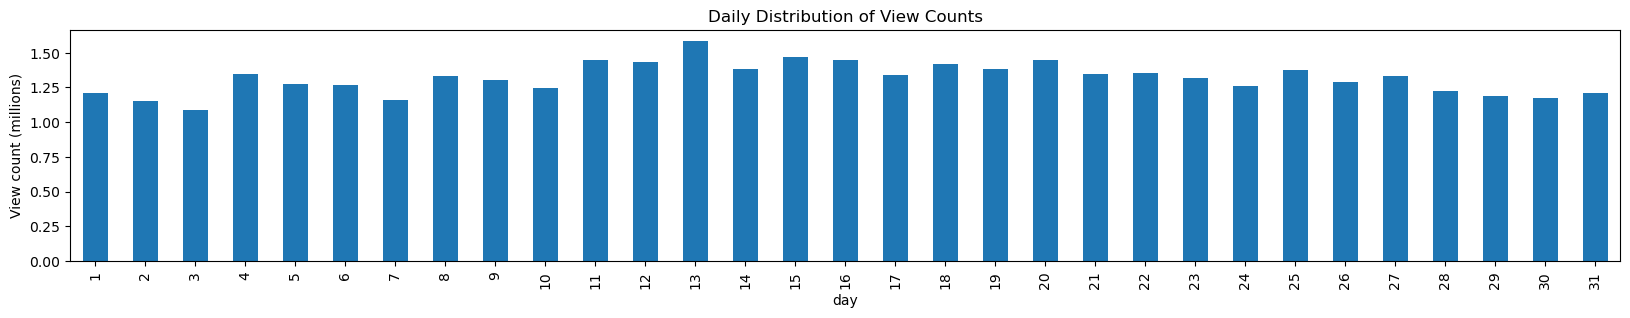

In [ ]:
from pyspark.sql.functions import date_trunc, count, dayofmonth
import pandas as pd
import matplotlib.pyplot as plt

# Group data by day and count views
views_by_day = ecom_hour_day.filter(col("event_type") == "view").groupBy(date_trunc("day", "event_time").alias("day")).agg(count("event_type").alias("view_count")).orderBy("day")

# Extract the day of the month from the 'day' column
views_by_day = views_by_day.withColumn('day', dayofmonth('day'))

# Convert the result to a Pandas DataFrame
views_by_day_pd = views_by_day.toPandas()

# Convert the y-axis values to millions
views_by_day_pd['view_count'] = views_by_day_pd['view_count'] / 1e6

# Plot the bar chart
#fig, ax = plt.subplots(figsize=(8, 6))
ax = views_by_day_pd.plot(kind='bar', x='day', y='view_count', legend=None)
ax.set_ylabel('View count (millions)')
plt.title('Daily Distribution of View Counts')
plt.show()


Through the data exploration of customers browsing products in October, we found that customers view more times in the middle of the month. We can focus marketing on specific products in the coming months, or adjust inventory levels to ensure that there are sufficient quantities of popular products in stock during peak periods.

Lets look into the distribution of views and other events on a daily basis and how they are distributed.

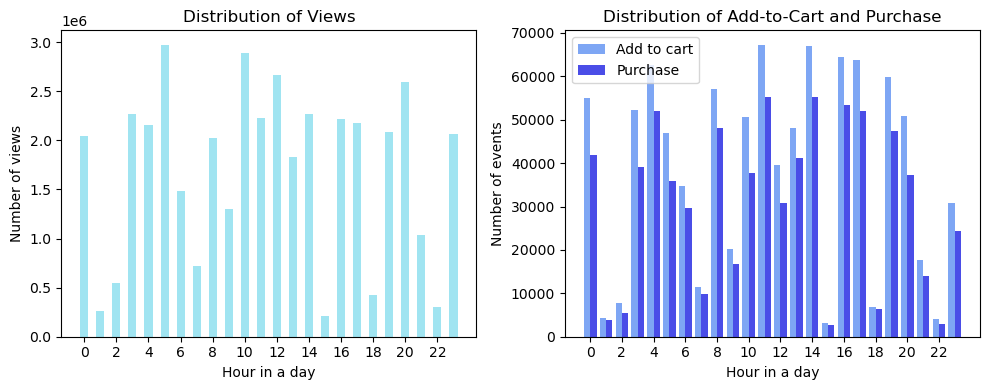

In [ ]:
import numpy as np

event_by_hour = ecom_hour_day.groupBy(hour("event_time").alias("hour"), "event_type") \
                   .agg(count("*").alias("count"))

# pivot the event types to columns
event_by_hour = event_by_hour.groupBy("hour") \
                             .pivot("event_type", ["view", "cart", "purchase"]) \
                             .sum("count") \
                             .fillna(0)

# plot the results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ind = np.arange(event_by_hour.select("hour").rdd.flatMap(lambda x: x).min(),
                event_by_hour.select("hour").rdd.flatMap(lambda x: x).max()+1)
width = 0.5

# plot the distribution of views
view_bar = ax1.bar(ind, event_by_hour.select("view").rdd.flatMap(lambda x: x).collect(),
                   width=width, color='#A0E4F1')
ax1.set_xticks(ind)
ax1.set_xticks(ax1.get_xticks()[::2])
ax1.set_xlabel("Hour in a day")
ax1.set_ylabel("Number of views")
ax1.set_title("Distribution of Views")

# plot the distribution of add-to-cart and purchase events
width = 0.4
cart_bar = ax2.bar(ind, event_by_hour.select("cart").rdd.flatMap(lambda x: x).collect(),
                   width=width, color='#7EA6F4')
purchase_bar = ax2.bar(ind+width, event_by_hour.select("purchase").rdd.flatMap(lambda x: x).collect(),
                       width=width, color='#4A4DE7')
ax2.set_xticks(ind+width/2)
ax2.set_xticks(ax2.get_xticks()[::2])
ax2.set_xticklabels(ind[::2])
ax2.set_xlabel("Hour in a day")
ax2.set_ylabel("Number of events")
ax2.set_title("Distribution of Add-to-Cart and Purchase")
ax2.legend((cart_bar, purchase_bar), ('Add to cart', 'Purchase'))

# show the plot
plt.tight_layout()
plt.show()

Both graphs show that there are the least amount of users around 1-2am, 3pm, and 9-10pm. We can also see that most people who view a product they tend to it mostly arond 5am, between 10am-12pm, or  around 8pm. Similarly, people who add to cart and purchase are mostly active around 4am, 11am-2pm, a d 4-5pm. While it would be interesting to explore more why these are the most popular hours in the day, for now we could use this observation to concentrate most of the marketing activities around these times, as well as make sure that the website is running with no bugs.


Now that we have analysed some of the customer behaviour trends let's move onto the product side and find some of the popular brands and their average prices.

In [ ]:
from pyspark.sql import functions as F

total_view = event_by_hour.agg(F.sum('view')).collect()[0][0]
total_cart = event_by_hour.agg(F.sum('cart')).collect()[0][0]
total_purchase = event_by_hour.agg(F.sum('purchase')).collect()[0][0]

event_by_hour_pd = event_by_hour.toPandas()

event_by_hour_pd['view_pct'] = event_by_hour_pd['view'] / total_view * 100
event_by_hour_pd['cart_pct'] = event_by_hour_pd['cart'] / total_cart * 100
event_by_hour_pd['purchase_pct'] = event_by_hour_pd['purchase'] / total_purchase * 100


In [ ]:
event_by_hour_pd=event_by_hour_pd.sort_values(by='hour')

In [ ]:
event_by_hour_pd.head(24)

,hour,view,cart,purchase,view_pct,cart_pct,purchase_pct
22,0,299874,3982,2949,0.735357,0.429782,0.396985
2,1,545742,7759,5526,1.338279,0.837438,0.743893
21,2,1037315,17764,13968,2.543723,1.917290,1.880328
6,3,1485926,34725,29634,3.643815,3.747912,3.989236
13,4,1826454,48043,41146,4.478864,5.185339,5.538945
8,5,2020538,57024,48071,4.954801,6.154670,6.471167
4,6,2154468,62619,52005,5.283226,6.758545,7.000750
16,7,2217746,64566,53406,5.438398,6.968687,7.189348
14,8,2267899,67031,55197,5.561384,7.234737,7.430447
11,9,2229264,67236,55183,5.466643,7.256863,7.428562


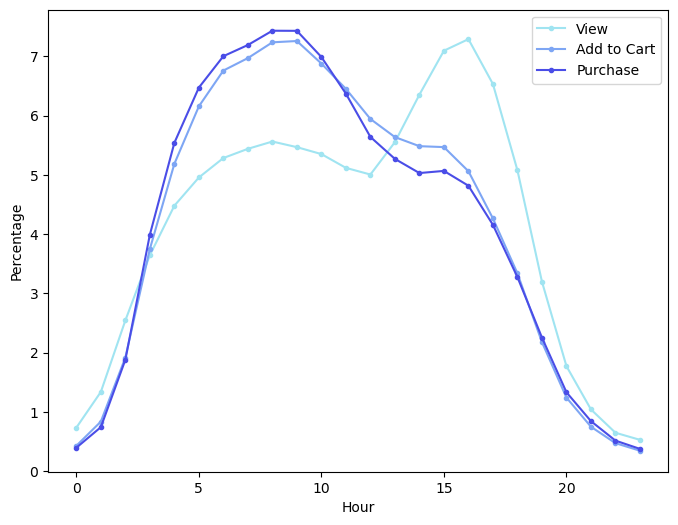

In [ ]:

# Extract the relevant data
hour = event_by_hour_pd['hour']
view_pct = event_by_hour_pd['view_pct']
cart_pct = event_by_hour_pd['cart_pct']
purchase_pct = event_by_hour_pd['purchase_pct']

# Create the line plots
#fig, ax = plt.subplots()
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(hour, view_pct,marker='.', color='#A0E4F1', label='View')
ax.plot(hour, cart_pct,marker='.', color='#7EA6F4', label='Add to Cart')
ax.plot(hour, purchase_pct,marker='.', color='#4A4DE7', label='Purchase')

# Set the axis labels and legend
ax.set_xlabel('Hour')
ax.set_ylabel('Percentage')
ax.legend(loc='best')

# Show the plot
plt.show()


The line chart above shows how the highest percentage of add-to-cart and purchase both occur in the morning around 9-10am and then gradually decrease throughout the day. The number of views though reaches its peak around 4pm before decreasing for the rest of the day.

#### 2.1.3 Conversion Rate

In [ ]:
from pyspark.sql.functions import col

# read the combined file as a Spark dataframe
df = ecom_oct

# calculate event counts
view_count = df.filter(col("event_type") == "view").count()
cart_count = df.filter(col("event_type") == "cart").count()
purchase_count = df.filter(col("event_type") == "purchase").count()

# calculate conversion rates
view_to_purchase_rate = (purchase_count / view_count) * 100
view_to_cart_rate = (cart_count / view_count) * 100
cart_to_purchase_rate = (purchase_count / cart_count) * 100

# print the conversion rates
print("Rate of conversion between view and purchase events: {:.2f}%".format(view_to_purchase_rate))
print("Rate of conversion between view and add to cart events: {:.2f}%".format(view_to_cart_rate))
print("Rate of conversion between add to cart and purchase events: {:.2f}%".format(cart_to_purchase_rate))


Rate of conversion between view and purchase events: 1.82%
Rate of conversion between view and add to cart events: 2.27%
Rate of conversion between add to cart and purchase events: 80.18%


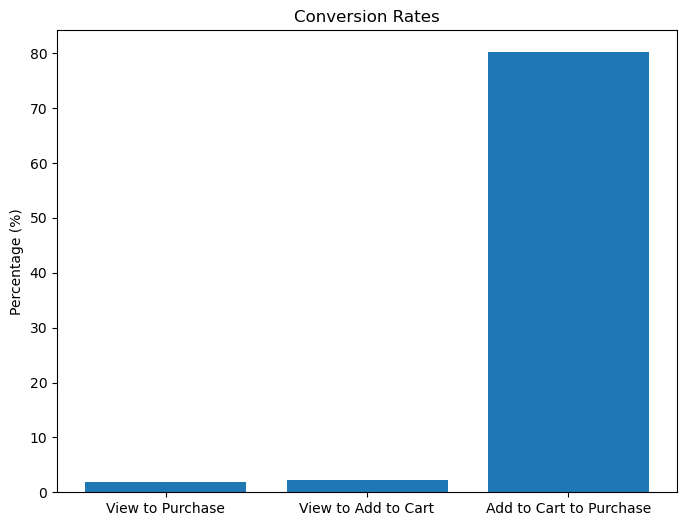

In [ ]:
import matplotlib.pyplot as plt

# create a bar plot of the conversion rates
labels = ['View to Purchase', 'View to Add to Cart', 'Add to Cart to Purchase']
values = [view_to_purchase_rate, view_to_cart_rate, cart_to_purchase_rate]

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(labels, values, color=['#4C72B0', '#55A868', '#C44E52'])
plt.bar(labels, values)
plt.title('Conversion Rates')
plt.ylabel('Percentage (%)')

plt.show()

As shown in the bar chart above, the highest conversion rate is given by users who move from the add-to-cart stage to the purchase stage (around 80%). Users who move from view to purchase and from view to add-to-cart are significantly lower though (less than 10%).

####2.1.4 ATCR and CAR

Now we'll dive into analyzing the add-to-cart-rate (ATCR) and cart abandonement rate (CAR) throughout different time sessions in the day.

In [ ]:
# Add new columns for 'date' and 'time'.
ecom_oct = ecom_oct.withColumn("date", to_date(col("event_time"))) \
       .withColumn("time", col("event_time").cast("timestamp").cast("string").substr(12, 8))


In [ ]:
ecom_oct.show(5)

+-------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+----------+--------+----+------------+
|         event_time|event_type|product_id|        category_id|       category_code|   brand|  price|  user_id|        user_session|      date|    time|hour|time_session|
+-------------------+----------+----------+-------------------+--------------------+--------+-------+---------+--------------------+----------+--------+----+------------+
|2019-10-01 00:00:00|      view|  44600062|2103807459595387724|                null|shiseido|  35.79|541312140|72d76fde-8bb3-4e0...|2019-10-01|00:00:00|   0|         0-3|
|2019-10-01 00:00:00|      view|   3900821|2053013552326770905|appliances.enviro...|    aqua|   33.2|554748717|9333dfbd-b87a-470...|2019-10-01|00:00:00|   0|         0-3|
|2019-10-01 00:00:01|      view|  17200506|2053013559792632471|furniture.living_...|    null|  543.1|519107250|566511c2-e2e3-422...|2019-10-01|00

In [ ]:
from pyspark.sql.functions import col, when
from pyspark.sql.types import StringType

# Define the session labels and time session breaks.
session_labels = ['0-3', '3-6', '6-9', '9-12', '12-15', '15-18', '18-21', '21-24']
time_session_break = [0, 3, 6, 9, 12, 15, 18, 21, float('inf')]

# Add a new column 'hour' containing the hour of the day from the 'time' column.
ecom_oct = ecom_oct.withColumn("hour", col("time").substr(1, 2).cast("int"))

# Use the 'when' function to create a new column 'time_session' containing the session labels.
ecom_oct = ecom_oct.withColumn("time_session", when(col("hour") < 3, session_labels[0]) \
                                 .when((col("hour") >= 3) & (col("hour") < 6), session_labels[1]) \
                                 .when((col("hour") >= 6) & (col("hour") < 9), session_labels[2]) \
                                 .when((col("hour") >= 9) & (col("hour") < 12), session_labels[3]) \
                                 .when((col("hour") >= 12) & (col("hour") < 15), session_labels[4]) \
                                 .when((col("hour") >= 15) & (col("hour") < 18), session_labels[5]) \
                                 .when((col("hour") >= 18) & (col("hour") < 21), session_labels[6]) \
                                 .otherwise(session_labels[7]))

# Cast the 'time_session' column to StringType.
ecom_oct = ecom_oct.withColumn("time_session", col("time_session").cast(StringType()))




In [ ]:
# Show the resulting DataFrame.
ecom_oct.select("time", "time_session").show(2)

+--------+------------+
|    time|time_session|
+--------+------------+
|00:00:00|         0-3|
|00:00:00|         0-3|
+--------+------------+
only showing top 2 rows



In [ ]:
from pyspark.sql.functions import countDistinct

user_session_by_time_session = ecom_oct.dropDuplicates(['user_session']) \
    .groupBy('time_session').agg(countDistinct('user_session').alias('num_user_session'))


In [ ]:
user_session_by_time_session.show()

+------------+----------------+
|time_session|num_user_session|
+------------+----------------+
|       12-15|         1615038|
|       21-24|          166792|
|       15-18|         1697636|
|       18-21|          757741|
|         0-3|          474363|
|        9-12|         1573916|
|         3-6|         1319619|
|         6-9|         1639316|
+------------+----------------+



In [ ]:
from pyspark.sql.functions import count, col

cart_sessions = ecom_oct.filter(col('event_type') == 'cart')
user_session_cart_by_time_session = cart_sessions.groupBy('time_session') \
    .agg(count('user_session').alias('num_user_session_cart'))


In [ ]:
user_session_cart_by_time_session.show()

+------------+---------------------+
|time_session|num_user_session_cart|
+------------+---------------------+
|       12-15|               158076|
|       15-18|               137050|
|         0-3|                29505|
|        9-12|               190706|
|         3-6|               139792|
|         6-9|               194216|
|       21-24|                14556|
|       18-21|                62613|
+------------+---------------------+



In [ ]:
from pyspark.sql.functions import coalesce, lit

atcr_by_time_session = user_session_by_time_session.join(user_session_cart_by_time_session, 'time_session', 'outer') \
    .select('time_session', coalesce('num_user_session', lit(0)).alias('num_user_session'),
            coalesce('num_user_session_cart', lit(0)).alias('num_user_session_cart'))



In [ ]:
from pyspark.sql.functions import when, col

atcr_by_time_session = atcr_by_time_session.withColumn('atcr', when(col('num_user_session') != 0,
                                                        col('num_user_session_cart') / col('num_user_session') * 100)
                                                      .otherwise(0))


In [ ]:
atcr_by_time_session.show()

+------------+----------------+---------------------+------------------+
|time_session|num_user_session|num_user_session_cart|              atcr|
+------------+----------------+---------------------+------------------+
|         0-3|          474363|                29505|6.2199201877043535|
|       12-15|         1615038|               158076| 9.787757315926932|
|       15-18|         1697636|               137050| 8.072990912068311|
|       18-21|          757741|                62613|  8.26311364965074|
|       21-24|          166792|                14556| 8.727037267974483|
|         3-6|         1319619|               139792|10.593360659402448|
|         6-9|         1639316|               194216| 11.84738024883549|
|        9-12|         1573916|               190706| 12.11665679744027|
+------------+----------------+---------------------+------------------+



In [ ]:
sorted_df = atcr_by_time_session.orderBy(col("time_session").asc())

In [ ]:
sorted_df = sorted_df.withColumn("sorting_index", 
    when(col("time_session") == "0-3", 1)
    .when(col("time_session") == "3-6", 2)
    .when(col("time_session") == "6-9", 3)
    .when(col("time_session") == "9-12", 4)
     .when(col("time_session") == "12-15", 4)
     .when(col("time_session") == "15-18", 5)
    .when(col("time_session") == "18-21", 6)
      .when(col("time_session") == "12-15", 7)                           
    .otherwise(8)
)

sorted_df = sorted_df.orderBy(col("sorting_index").asc())

# Drop the sorting index column if needed
sorted_df = sorted_df.drop("sorting_index")

In [ ]:
sorted_df.show()

+------------+----------------+---------------------+------------------+
|time_session|num_user_session|num_user_session_cart|              atcr|
+------------+----------------+---------------------+------------------+
|         0-3|          474363|                29505|6.2199201877043535|
|         3-6|         1319619|               139792|10.593360659402448|
|         6-9|         1639316|               194216| 11.84738024883549|
|        9-12|         1573916|               190706| 12.11665679744027|
|       12-15|         1615038|               158076| 9.787757315926932|
|       15-18|         1697636|               137050| 8.072990912068311|
|       18-21|          757741|                62613|  8.26311364965074|
|       21-24|          166792|                14556| 8.727037267974483|
+------------+----------------+---------------------+------------------+



In [ ]:
from pyspark.sql.functions import avg

# Assuming your DataFrame is named 'df' and the column you want to calculate average for is named 'column_name'
avg_atcr = sorted_df.select(avg(col("atcr"))).collect()[0][0]


In [ ]:
from pyspark.sql.functions import count, col

purchase_sessions = ecom_oct.filter(col('event_type') == 'purchase')
user_session_purchase_by_time_session = purchase_sessions.groupBy('time_session') \
    .agg(count('user_session').alias('num_user_session_purchase'))


In [ ]:
user_session_purchase_by_time_session.show()

+------------+-------------------------+
|time_session|num_user_session_purchase|
+------------+-------------------------+
|       12-15|                   118389|
|       15-18|                   104278|
|         0-3|                    22443|
|        9-12|                   154398|
|         3-6|                   118851|
|         6-9|                   160608|
|       21-24|                    12917|
|       18-21|                    50965|
+------------+-------------------------+



In [ ]:
from pyspark.sql.functions import coalesce, lit

ctcr_by_time_session = user_session_cart_by_time_session.join(user_session_purchase_by_time_session, 'time_session', 'outer') \
    .select('time_session', coalesce('num_user_session_cart', lit(0)).alias('num_user_session_cart'),
            coalesce('num_user_session_purchase', lit(0)).alias('num_user_session_purchase'))

In [ ]:
from pyspark.sql.functions import when, col

ctcr_by_time_session = ctcr_by_time_session.withColumn('ctcr', when(col('num_user_session_cart') != 0,
                                                        col('num_user_session_purchase') / col('num_user_session_cart') * 100)
                                                      .otherwise(0))

In [ ]:
ctcr_by_time_session.show()

+------------+---------------------+-------------------------+-----------------+
|time_session|num_user_session_cart|num_user_session_purchase|             ctcr|
+------------+---------------------+-------------------------+-----------------+
|         0-3|                29505|                    22443|76.06507371631926|
|       12-15|               158076|                   118389| 74.8937220071358|
|       15-18|               137050|                   104278|76.08755928493251|
|       18-21|                62613|                    50965|81.39683452318208|
|       21-24|                14556|                    12917|88.74003847210771|
|         3-6|               139792|                   118851|85.01988668879477|
|         6-9|               194216|                   160608|82.69555546401945|
|        9-12|               190706|                   154398|80.96127022747056|
+------------+---------------------+-------------------------+-----------------+



In [ ]:
from pyspark.sql.functions import lit, col

ctcr_by_time_session = ctcr_by_time_session.withColumn('car', lit(100) - col('ctcr'))
ctcr_by_time_session.show()


+------------+---------------------+-------------------------+-----------------+------------------+
|time_session|num_user_session_cart|num_user_session_purchase|             ctcr|               car|
+------------+---------------------+-------------------------+-----------------+------------------+
|         0-3|                29505|                    22443|76.06507371631926| 23.93492628368074|
|       12-15|               158076|                   118389| 74.8937220071358|25.106277992864193|
|       15-18|               137050|                   104278|76.08755928493251| 23.91244071506749|
|       18-21|                62613|                    50965|81.39683452318208| 18.60316547681792|
|       21-24|                14556|                    12917|88.74003847210771|11.259961527892287|
|         3-6|               139792|                   118851|85.01988668879477| 14.98011331120523|
|         6-9|               194216|                   160608|82.69555546401945| 17.30444453598055|


In [ ]:
sorted_df1 = ctcr_by_time_session.withColumn("sorting_index", 
    when(col("time_session") == "0-3", 1)
    .when(col("time_session") == "3-6", 2)
    .when(col("time_session") == "6-9", 3)
    .when(col("time_session") == "9-12", 4)
     .when(col("time_session") == "12-15", 4)
     .when(col("time_session") == "15-18", 5)
    .when(col("time_session") == "18-21", 6)
      .when(col("time_session") == "12-15", 7)                           
    .otherwise(8)
)

sorted_df1 = sorted_df1.orderBy(col("sorting_index").asc())

# Drop the sorting index column if needed
sorted_df1 = sorted_df1.drop("sorting_index")

In [ ]:
sorted_df1.show()

+------------+---------------------+-------------------------+-----------------+------------------+
|time_session|num_user_session_cart|num_user_session_purchase|             ctcr|               car|
+------------+---------------------+-------------------------+-----------------+------------------+
|         0-3|                29505|                    22443|76.06507371631926| 23.93492628368074|
|         3-6|               139792|                   118851|85.01988668879477| 14.98011331120523|
|         6-9|               194216|                   160608|82.69555546401945| 17.30444453598055|
|        9-12|               190706|                   154398|80.96127022747056|19.038729772529436|
|       12-15|               158076|                   118389| 74.8937220071358|25.106277992864193|
|       15-18|               137050|                   104278|76.08755928493251| 23.91244071506749|
|       18-21|                62613|                    50965|81.39683452318208| 18.60316547681792|


In [ ]:
from pyspark.sql.functions import avg

# Assuming your DataFrame is named 'df' and the column you want to calculate average for is named 'column_name'
avg_car = sorted_df1.select(avg(col("car"))).collect()[0][0]

In [ ]:
avg_car

19.26750745200473

In [ ]:
avg_atcr

9.45352712987538

Text(0.5, 1.0, 'ATCR and Cart Abandonment Rate')

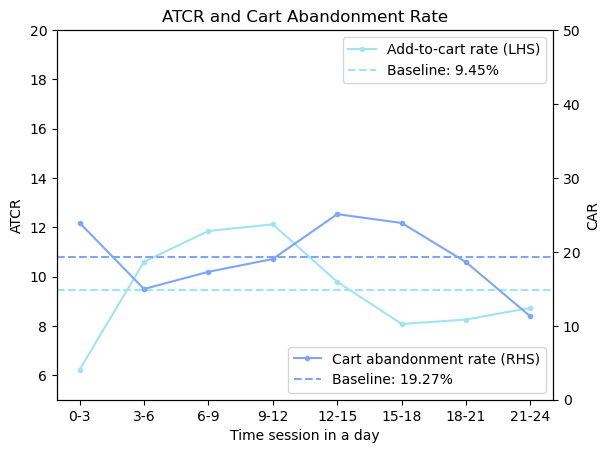

In [ ]:
sorted_df_pandas = sorted_df.toPandas()
sorted_df1_pandas = sorted_df1.toPandas()


import matplotlib.pyplot as plt

# Create a plot with two y-axes
fig, ax1 = plt.subplots()

avg_atcr = round(avg_atcr,2)
avg_car=round(avg_car,2)

ax1.plot(sorted_df_pandas['time_session'], sorted_df_pandas['atcr'], marker='.', color='#A0E4F1', label='Add-to-cart rate (LHS)')
ax1.axhline(y=avg_atcr, linestyle='--', color='#A0E4F1', linewidth=1.5, label=f'Baseline: {avg_atcr}%')
ax1.set_ylim([5, 20])
ax1.set_xlabel("Time session in a day")
ax1.set_ylabel("ATCR")
ax1.legend(loc="upper right")

ax2 = ax1.twinx()
ax2.plot(sorted_df1_pandas['time_session'], sorted_df1_pandas['car'], marker='.', color='#7EA6F4', label='Cart abandonment rate (RHS)')
ax2.axhline(y=avg_car, linestyle='--', color='#7EA6F4', linewidth=1.5, label=f'Baseline: {avg_car}%')
ax2.set_ylim([0, 50])
ax2.set_ylabel("CAR")
ax2.legend(loc="lower right")

plt.title("ATCR and Cart Abandonment Rate")
#plt.xticks(time_sessions, session_labels)







In the line chart, we plotted the different time sessions in the day on the x-axis, ATCR on the left axis, and CAR on the right axis.

We can clearly see that 6am-12pm is the peak of add-to-cart rate and purchase share, which is around 12%, higher than the average rate of 9.45%, so people prefer to pick and shop for products in the morning. Around 12:00pm-3:00pm is the peak of cart abandonement rate, reaching almost 25%, and with an overall average of about 19.26%. Cart abandonement rate will decline later in the day, and add-to-cart rate will also be less pronounced after peak hours, suggesting an overall decline in user activity. Perhaps customers prefer to make their purchase decisions in the morning, at a more sober time of day.

### 2.2User Analysis

#### 2.2.1 Find the most active users

To incentivize more effective spending, we can focus on identifying and engaging active users by offering them tailored promotions and activities. By targeting these individuals, we can encourage them to continue engaging with our platform and increase their overall spending.

In [ ]:
from pyspark.sql.functions import count, desc

counts_user = ecom_oct.groupby('user_id').agg(count('*').alias('count')).orderBy(desc('count'))


In [ ]:
from pyspark.sql.functions import sum

total_prices = ecom_oct.groupBy('user_id').agg(sum('price').alias('total_price'))

In [ ]:
user_data = counts_user.join(total_prices, on='user_id', how='inner')
user_data_top20 = user_data.sort('count', ascending=False).limit(20).toPandas()

In [ ]:
from pyspark.sql import SparkSession

# create a SparkSession
spark = SparkSession.builder.appName("my_app").getOrCreate()

# convert the Pandas DataFrame to a PySpark DataFrame
pyspark_df = spark.createDataFrame(user_data_top20)

23/05/01 09:03:15 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [ ]:
from pyspark.sql.functions import col

user_data_top20_1 = pyspark_df.withColumn("user_id_1", col("user_id").cast("string"))
user_data_top20_1.toPandas()

,user_id,count,total_price,user_id_1
0,512475445,7436,841213.02,512475445
1,512365995,4013,1499595.88,512365995
2,526731152,2912,935684.46,526731152
3,512505687,2894,684681.19,512505687
4,513021392,2862,487022.90,513021392
5,546159478,2433,398710.20,546159478
6,546270188,2426,223296.35,546270188
7,514649263,2390,257310.86,514649263
8,516308435,2316,460647.03,516308435
9,512401084,2232,314913.72,512401084


<Figure size 1600x1000 with 0 Axes>

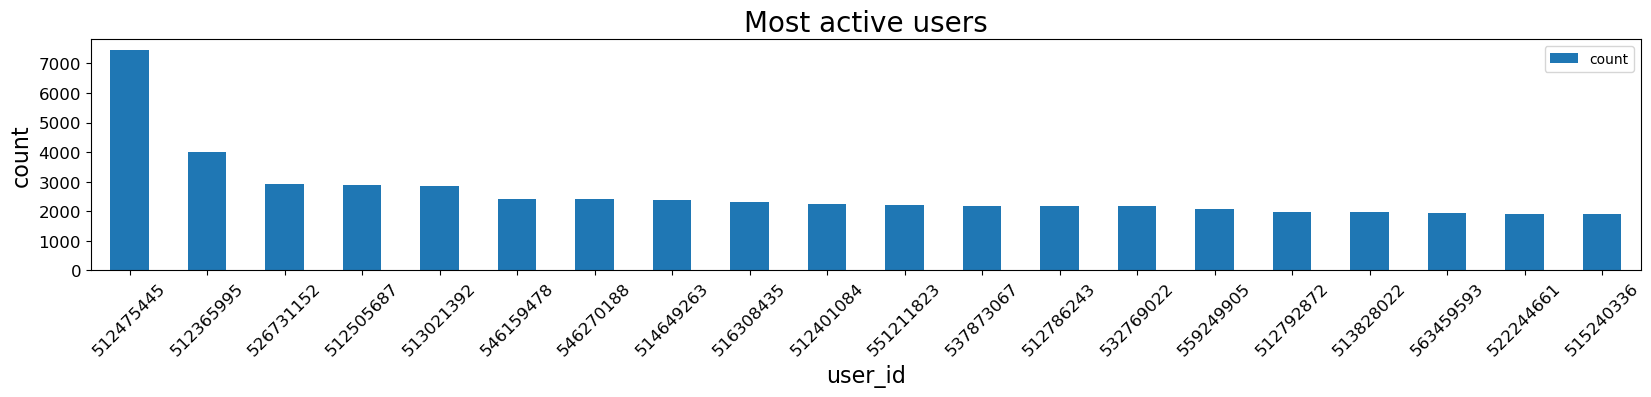

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
pandas_df = user_data_top20_1.toPandas()
plt.figure(figsize=(16, 10))
pandas_df.plot(kind='bar', x='user_id_1', y='count', rot=45)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Most active users", fontsize=20)
plt.xlabel("user_id", fontsize=16)
plt.ylabel("count", fontsize=16)
plt.show()

Based on the picture we can find the IDs of the most active users, and for these users we can propose strategies to make them more motivated to buy, such as pushing more offers to them.

#### 2.2.2 The highest earnings per session

Below we're analyzing the top 20 brands that capture the highest earnings per session:

In [ ]:
from pyspark.sql.functions import sum, col, count

df_purchase = ecom_oct.filter(col('event_type') == 'purchase')
df_grouped_sales = df_purchase.groupBy('brand').agg(sum('price').alias('total_sales'))

df_view = ecom_oct.filter(col('event_type') == 'view')
df_grouped_views = df_view.groupBy('brand').agg(count('event_type').alias('views_count'))

# Join the two DataFrames on 'brand' column
df_join = df_grouped_sales.join(df_grouped_views, 'brand', 'inner')

# Calculate the ratio of total_sales to views_count
df_ratio = df_join.withColumn('Earning per Session', col('total_sales') / col('views_count'))

# Sort the result in descending order by 'sales_per_view'
df_sorted_ratio = df_ratio.sort('Earning per Session', ascending=False)

df_sorted_ratio.show()

+--------------+-------------------+-----------+-------------------+
|         brand|        total_sales|views_count|Earning per Session|
+--------------+-------------------+-----------+-------------------+
|          evga|           14746.59|        381|  38.70496062992126|
|         doona|             383.54|         10|             38.354|
|         chaod|             432.44|         13|  33.26461538461538|
|         apple|1.112092688200001E8|    3770597| 29.493809288025236|
|         orium|           11487.05|        445| 25.813595505617975|
| dreammachines|            1801.82|         81| 22.244691358024692|
|        oribel|             245.12|         12| 20.426666666666666|
|        navien|          382956.86|      20046| 19.103904020752267|
|      vardoven|            3140.38|        168| 18.692738095238095|
|      crusader|             203.35|         11| 18.486363636363635|
|         jinyu| 2670.5899999999997|        146| 18.291712328767122|
|      schecter|            5043.2

Based on the icons we can find the brands that benefit the most from each session and we can also develop better sales strategies for them.

#### 2.2.3 The highest spending per session

Below we're analyzing the top 20 users that capture the highest spending per session.

In [ ]:
from pyspark.sql.functions import sum, col, count
user_data = counts_user.join(total_prices, on='user_id', how='inner')
user_data_top50 = user_data.sort('count', ascending=False).limit(50).toPandas()

df_purchase = ecom_oct.filter(col('event_type') == 'purchase')
df_grouped_sales = df_purchase.groupBy('user_id').agg(sum('price').alias('total_sales'))

df_view = ecom_oct.filter(col('event_type') == 'view')
df_grouped_views = df_view.groupBy('user_id').agg(count('event_type').alias('session_count'))

# Join the two DataFrames on 'user_id' column
df_join = df_grouped_sales.join(df_grouped_views, 'user_id', 'inner')

# Calculate the ratio of total_sales to session_count
df_ratio = df_join.withColumn('Spending per Session', col('total_sales') / col('session_count'))

# Sort the result in descending order by 'Earning per Session'
df_sorted_ratio = df_ratio.sort('Spending per Session', ascending=False)

df_sorted_ratio.show()


+---------+-----------+-------------+--------------------+
|  user_id|total_sales|session_count|Spending per Session|
+---------+-----------+-------------+--------------------+
|532268591|     2715.6|            1|              2715.6|
|562137230|    4787.26|            2|             2393.63|
|516768996|    2082.16|            1|             2082.16|
|514958134|     2072.1|            1|              2072.1|
|531900463|    2056.68|            1|             2056.68|
|564372960|     2041.2|            1|              2041.2|
|563254866|    2033.26|            1|             2033.26|
|565724619|    2022.95|            1|             2022.95|
|560835910|     2007.7|            1|              2007.7|
|515911080|    1917.66|            1|             1917.66|
|558569304|    1904.55|            1|             1904.55|
|521671914|    1904.55|            1|             1904.55|
|537481596|    1903.52|            1|             1903.52|
|548132565|    1901.98|            1|             1901.9

### 2.3Analyzing Brands 

#### 2.3.1 Analyze the brands that are the most popular among our users

In [ ]:
from pyspark.sql.functions import *
from pyspark.sql.functions import desc

ecom_brand = ecom_oct.dropna(subset=["brand"])
brands = ecom_brand.groupBy("brand").count().orderBy(desc("count")).limit(15)
brands_pd = brands.toPandas()

In [ ]:
brands_pd.head(5)

,brand,count
0,samsung,5282775
1,apple,4122554
2,xiaomi,3083763
3,huawei,1111205
4,lucente,655861


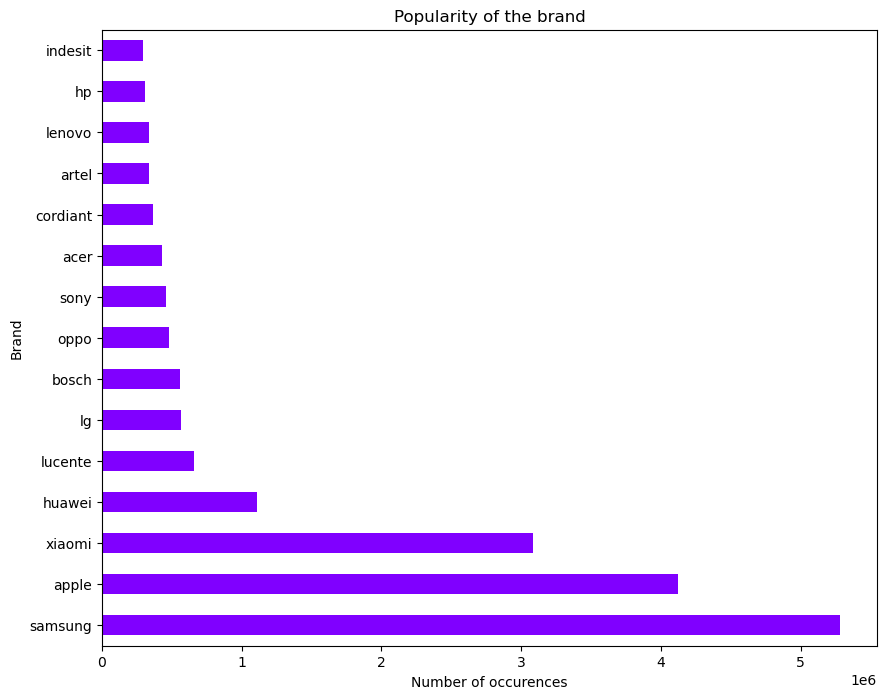

In [ ]:
#Creates a horizontal bar chart to visualize the popularity of different brands in the e-commerce dataset. 
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import cm

cmap = cm.get_cmap('rainbow')
fig, ax = plt.subplots(figsize=(10, 8))  # set the figure size here
ax = brands_pd.plot(kind='barh', x='brand', y='count', cmap=cmap, legend=None, ax=ax)
ax.set_ylabel('Brand')
ax.set_xlabel('Number of occurences')
ax.set_title("Popularity of the brand")
plt.show()


Through the bar plot, we found that Samsung, Apple, Xiaomi, and Huawei are the top 4 brands that customers pay most attention to (view, add to shopping cart, and purchase) in the online store. Based on this finding, we notice that they're all electronics and we can suggest the Marketing team to create personalized advertisements for each brand. We can also recommend the Sales team to provide these brands with exclusive discounts and other ways to increase sales on the platform.

In [ ]:
from pyspark.sql.functions import avg, desc, count

avg_price = ecom_oct.groupBy("brand") \
                    .agg(avg("price").alias("average_price")) \
                    .orderBy(desc("average_price"))

avg_price.show()

+-------------+------------------+
|        brand|     average_price|
+-------------+------------------+
|    climadiff| 2393.170979020979|
|    pinarello|  2382.34052631579|
|     fondital| 2174.664910071943|
|         rado|2087.4551580831185|
|       jumper|           1853.33|
|         shua|1850.0912747035572|
|         oris|1830.9878047978966|
|dreammachines|           1801.82|
|       hartan|1801.8199999999997|
|   minimotors|1789.1808311688308|
|      mercury|1758.8835455597816|
|        gitzo| 1750.329090909091|
|         jura|1703.4717707231039|
|        honda|1688.5899999999986|
| cooperhunter|           1674.47|
|         peda| 1660.251780741751|
|      jupiter|1646.5189423076922|
|        neman|           1645.86|
|     rotiform|1621.6600000000005|
|        niche|1621.6600000000003|
+-------------+------------------+
only showing top 20 rows



#### 2.3.2 Average Price by Brand

In [ ]:
import pandas as pd
avg_price_pd = avg_price.toPandas()
avg_price_pd.dropna(inplace=True)
avg_price_pd=avg_price_pd.head(25)

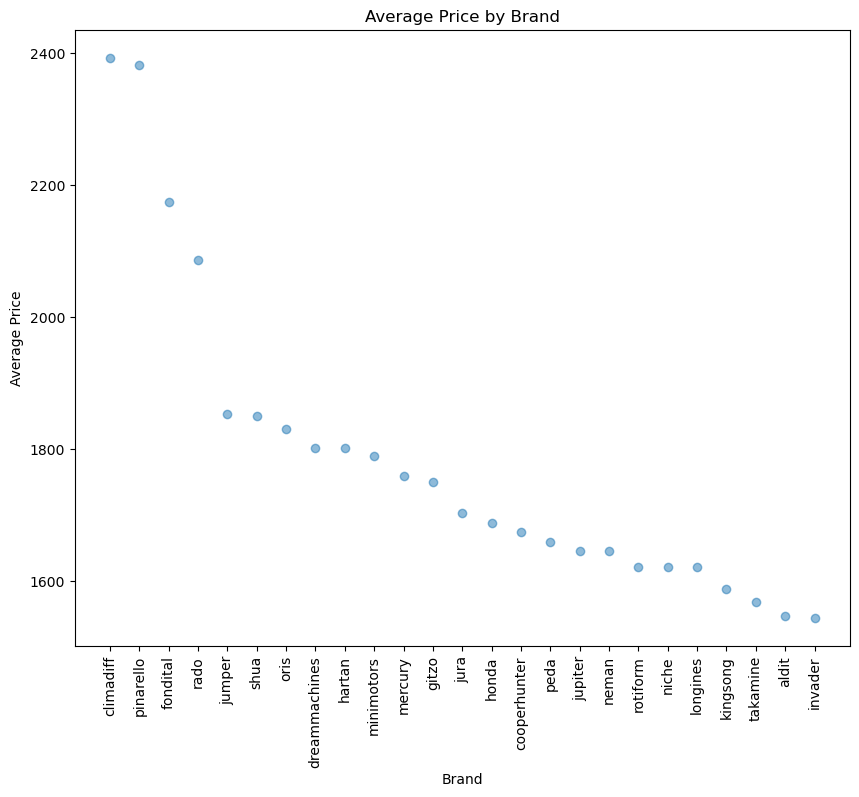

In [ ]:

plt.figure(figsize=(10, 8)) 
plt.scatter(avg_price_pd['brand'], avg_price_pd['average_price'], alpha=0.5)

# set the x-axis label
plt.xlabel('Brand')
plt.xticks(rotation=90)
# set the y-axis label
plt.ylabel('Average Price')

# set the plot title
plt.title('Average Price by Brand')

# show the plot
plt.show()

#### 2.3.3 Exploring the most popular brand, Samsung.

In [ ]:
#explore top brand(Samsung):

from pyspark.sql.functions import col,count

# Filter the DataFrame to only include rows where the brand is "samsung"
samsung = ecom_oct.filter(col('brand') == 'samsung')

samsung_sales = samsung.groupBy('product_id').agg(count('*').alias('sales'))

# Get the top 10 products by sales
top_products = samsung_sales.orderBy(col('sales').desc()).limit(10).toPandas()

# Print the top 10 products by sales
print(top_products)

   product_id   sales
0     1004856  500354
1     1004767  438232
2     1004833  237545
3     1004870  220501
4     1004836  165769
5     1004873  153992
6     1005100  122286
7     1004750  121626
8     1004659  102888
9     1801690   83391


In [ ]:
from pyspark.sql.functions import count, col

# Group the DataFrame by category_code
samsung_category_counts = samsung.groupBy('category_code').agg(count('*').alias('count'))

# Get the top 10 categories
top_categories = samsung_category_counts.orderBy(col('count').desc()).limit(10).toPandas()
print(top_categories)

                      category_code    count
0            electronics.smartphone  3778167
1              electronics.video.tv   392119
2         appliances.kitchen.washer   263017
3     appliances.environment.vacuum   206226
4                electronics.clocks   149106
5                              None   123872
6                electronics.tablet   105580
7       electronics.audio.headphone    87131
8  appliances.kitchen.refrigerators    68951
9      appliances.kitchen.microwave    35610


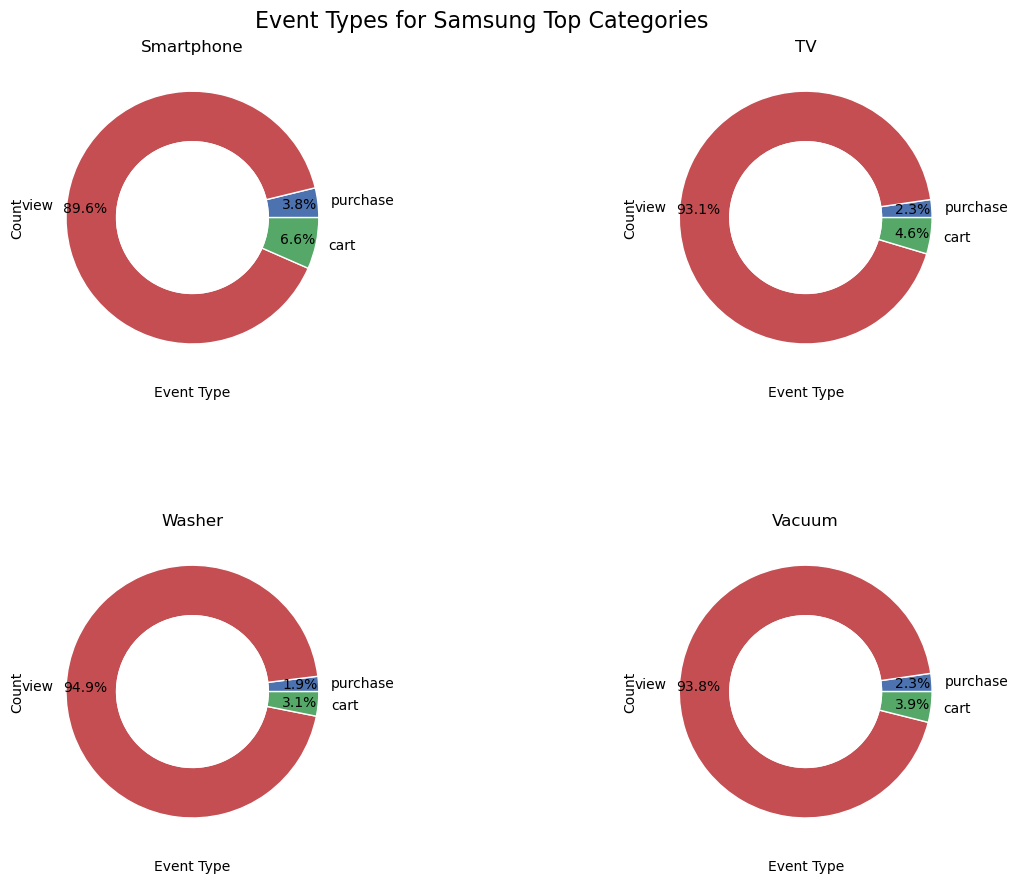

In [ ]:
#Display the popular categories of Samsung products and their respective event types in the form of donut charts.
import pandas as pd
import matplotlib.pyplot as plt

# Define the categories and colors to use in the chart
categories = ['electronics.smartphone', 'electronics.video.tv', 'appliances.kitchen.washer', 'appliances.environment.vacuum']
colors = ['#4C72B0', '#C44E52', '#55A868', '#8172B2']

# Create a grid of subplots
fig, axs = plt.subplots(2, len(categories)//2, figsize=(14, 10))

# Loop through each category and plot the data on a separate subplot
for i, category in enumerate(categories):
    row = i // 2
    col = i % 2
    category_data = samsung.filter((samsung.category_code == category))
    category_events = category_data.groupBy('event_type').agg(count('*').alias('count'))
    
    # Convert to Pandas DataFrame
    df = category_events.toPandas()

    # Create the donut chart
    wedges, texts, autotexts = axs[row, col].pie(df['count'], labels=df['event_type'], autopct='%1.1f%%', pctdistance=0.85,
                                                 colors=colors, wedgeprops=dict(width=0.4, edgecolor='w'))

    # Add a circle in the center of the chart to create the "donut" effect
    circle = plt.Circle((0, 0), 0.6, color='white')
    axs[row, col].add_artist(circle)

    # Set the title and labels
    axs[row, col].set_title(f'{category}')
    axs[row, col].set_xlabel('Event Type')
    axs[row, col].set_ylabel('Count')

# Change the titles
axs[0, 0].set_title('Smartphone')
axs[0, 1].set_title('TV')
axs[1, 0].set_title('Washer')
axs[1, 1].set_title('Vacuum')

# Add a title and adjust spacing between subplots
plt.suptitle('Event Types for Samsung Top Categories', fontsize=16, y=0.95)
plt.subplots_adjust(wspace=0.3, hspace=0.5, top=0.9)
plt.show()


Overall, Samsung's top four product categories are smartphones, televisions, washers, and vacuums. However, the conversion rates for purchases or adding to the cart are relatively low. Retailers can increase the conversion rates for these popular products by improving product descriptions, offering competitive prices, sending follow-up reminders, and so on.


#### 2.3.4 Exploring the second most popular brand, Apple.

In [ ]:
from pyspark.sql.functions import col

# Filter the DataFrame to only include rows where the brand is "samsung"
apple = ecom_oct.filter(col('brand') == 'apple')
# Group the DataFrame by category_code
apple_category_counts = apple.groupBy('category_code').agg(count('*').alias('count'))

# Get the top 10 categories
appletop_categories = apple_category_counts.orderBy(col('count').desc()).limit(10).toPandas()
print(appletop_categories)

                    category_code    count
0          electronics.smartphone  3272845
1     electronics.audio.headphone   397597
2              electronics.clocks   242359
3              computers.notebook    87292
4              electronics.tablet    76222
5                            None    29902
6               computers.desktop     8922
7                 accessories.bag     4574
8  computers.peripherals.keyboard     1874
9     computers.peripherals.mouse      967


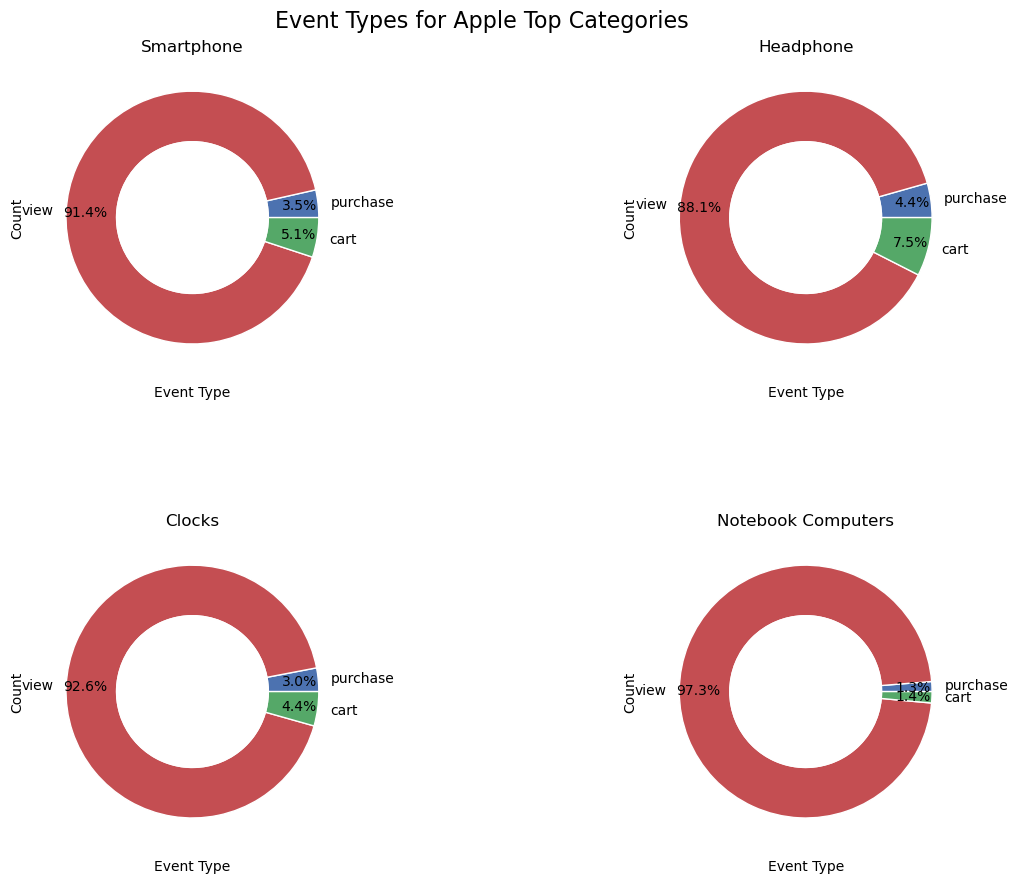

In [ ]:
#Apple donut chart
import pandas as pd
import matplotlib.pyplot as plt

# Define the categories and colors to use in the chart
categories = ['electronics.smartphone', 'electronics.audio.headphone', 'electronics.clocks', 'computers.notebook']
colors = ['#4C72B0', '#C44E52', '#55A868', '#8172B2']

# Create a grid of subplots
fig, axs = plt.subplots(2, len(categories)//2, figsize=(14, 10))

# Loop through each category and plot the data on a separate subplot
for i, category in enumerate(categories):
    row = i // 2
    col = i % 2
    apple_category_data = apple.filter((apple.category_code == category))
    apple_category_events = apple_category_data.groupBy('event_type').agg(count('*').alias('count'))
    
    # Convert to Pandas DataFrame
    apple_df = apple_category_events.toPandas()

    # Create the donut chart
    wedges, texts, autotexts = axs[row, col].pie(apple_df['count'], labels=apple_df['event_type'], autopct='%1.1f%%', pctdistance=0.85,
                                                 colors=colors, wedgeprops=dict(width=0.4, edgecolor='w'))

    # Add a circle in the center of the chart to create the "donut" effect
    circle = plt.Circle((0, 0), 0.6, color='white')
    axs[row, col].add_artist(circle)

    # Set the title and labels
    axs[row, col].set_title(f'{category}')
    axs[row, col].set_xlabel('Event Type')
    axs[row, col].set_ylabel('Count')

# Change the titles
axs[0, 0].set_title('Smartphone')
axs[0, 1].set_title('Headphone')
axs[1, 0].set_title('Clocks')
axs[1, 1].set_title('Notebook Computers')

# Add a title and adjust spacing between subplots
plt.suptitle('Event Types for Apple Top Categories', fontsize=16, y=0.95)
plt.subplots_adjust(wspace=0.3, hspace=0.5, top=0.9)
plt.show()


The top four product categories for Apple products are smartphones, headphones, clocks, and notebooks. The conversion rates for purchases and adding items to the cart are relatively higher for smartphones and headphones. Retailers can bundle these two products together to increase the opportunity for customers to make additional purchases.

### 2.4Highest Grossing Brands 

To analyze sales, a polar plot has been used to display the top 10 highest grossing brands, with each bar length representing the total sales. The electronics brands Apple, Samsung, and Xiaomi are at the top of the list, with high revenue in terms of sales.

In [ ]:
top_brands = ecom_oct.groupBy("brand").sum("price") \
                     .orderBy(desc("sum(price)")) \
                     .limit(10)

#top_brands.show()

from pyspark.sql.functions import log10

top_brands = ecom_oct.groupBy("brand").sum("price") \
                     .orderBy(desc("sum(price)")) \
                     .limit(10) \
                     .withColumn("log_sum(price)", log10("sum(price)"))



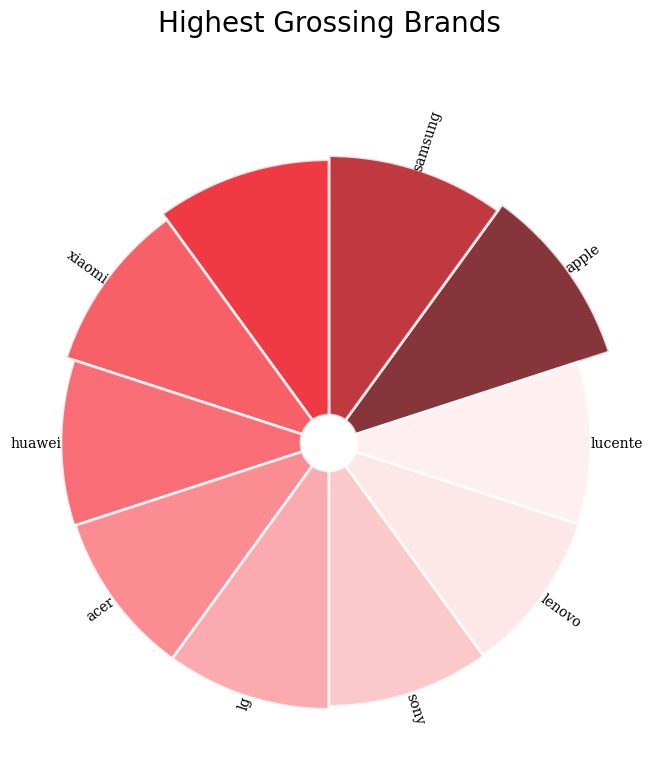

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sales_brand = top_brands.toPandas()

color_map = ['#680409', '#b20710', '#eb0915', '#f73842', '#f84854', '#f97077', '#fb969b', '#fcbcbf', '#fee1e3', '#feebed']

# initialize the figure
plt.figure(figsize=(10, 8))
ax = plt.subplot(111, polar=True)
ax.set_title("Highest Grossing Brands", y=1.2, pad=-14, size=20)
plt.axis('off')

# Constants = parameters controlling the plot layout
upper_limit = 16
lower_limit = 1

# Compute max and min in the dataset
max_val = sales_brand['log_sum(price)'].max()

slope = (max_val - lower_limit) / max_val
heights = slope * sales_brand['log_sum(price)'] + lower_limit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(sales_brand.index)

# Compute the angle each bar is centered on
indexes = list(range(1, len(sales_brand.index) + 1))
angles = [element * width for element in indexes]

# Draw bars
bars = ax.bar(x=angles, height=heights, width=width, bottom=lower_limit, linewidth=2, edgecolor="white", color=color_map, alpha=0.8)

# Add labels
for bar, angle, height, label in zip(bars, angles, heights, sales_brand["brand"]):
    rotation = np.rad2deg(angle)

    # Flipping labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation += 180
    else: 
        alignment = "left"

    # adding the labels
    ax.text(x=angle, y=lower_limit + bar.get_height(), s=label, ha=alignment, fontsize=10, fontfamily='serif',
            va='center', rotation=rotation, rotation_mode="anchor")

plt.show()


### 2.5Highest Earnings per session 

From a marketing perspective, it's important to not just understand the total sales/revenues but also the number of users that land on the page and are being converted, and which brands are obtaining higher earnings per session. This helps the e-commerce website understand better which brands deserve the marketing dollars and give a high return on the advertising investment. Therefore, an area plot has been used to visualize the top 10 brands with earnings per session. Here we see that the computer graphics card company EVGA is at the top of the list with the highest earning per session.

In [ ]:
from pyspark.sql.functions import sum, col, count

df_purchase = ecom_oct.filter(col('event_type') == 'purchase')
df_grouped_sales = df_purchase.groupBy('brand').agg(sum('price').alias('total_sales'))

df_view = ecom_oct.filter(col('event_type') == 'view')
df_grouped_views = df_view.groupBy('brand').agg(count('event_type').alias('views_count'))

# Join the two DataFrames on 'brand' column
df_join = df_grouped_sales.join(df_grouped_views, 'brand', 'inner')

# Calculate the ratio of total_sales to views_count
df_ratio = df_join.withColumn('Earning per Session', col('total_sales') / col('views_count'))

# Sort the result in descending order by 'sales_per_view'
df_sorted_ratio = df_ratio.sort('Earning per Session', ascending=False)

df_sorted_ratio.show()

+--------------+-------------------+-----------+-------------------+
|         brand|        total_sales|views_count|Earning per Session|
+--------------+-------------------+-----------+-------------------+
|          evga|           14746.59|        381|  38.70496062992126|
|         doona|             383.54|         10|             38.354|
|         chaod|             432.44|         13|  33.26461538461538|
|         apple|1.112092688200001E8|    3770597| 29.493809288025236|
|         orium|           11487.05|        445| 25.813595505617975|
| dreammachines|            1801.82|         81| 22.244691358024692|
|        oribel|             245.12|         12| 20.426666666666666|
|        navien|          382956.86|      20046| 19.103904020752267|
|      vardoven|            3140.38|        168| 18.692738095238095|
|      crusader|             203.35|         11| 18.486363636363635|
|         jinyu| 2670.5899999999997|        146| 18.291712328767122|
|      schecter|            5043.2

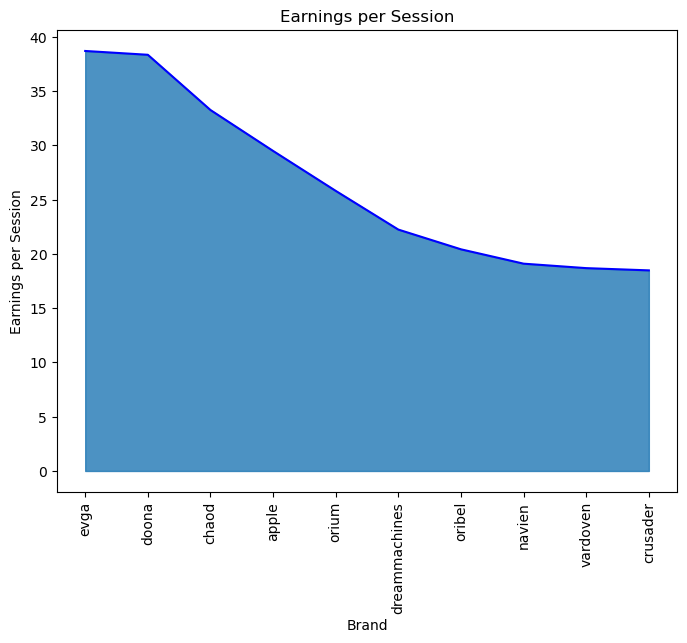

In [ ]:
df_top_10 = df_sorted_ratio.limit(10)
pandas_df = df_top_10.toPandas()

fig, ax = plt.subplots(figsize=(8, 6))

plt.fill_between(pandas_df['brand'], pandas_df['Earning per Session'], color='#1f77b4', alpha=0.8)
plt.plot(pandas_df['brand'], pandas_df['Earning per Session'], color='blue')
plt.title('Earnings per Session')
plt.xlabel('Brand')
plt.ylabel('Earnings per Session')
plt.xticks(rotation=90)
plt.show()

Interestingly, we can see that the more popular brands do not feature in the more expensive category. Perhaps consumers are extremely price sensitive and for the same reason they do not even look at expensive products!

Let’s move on to customer segmentation now and for that we would look into only the consumers who have purchased. To do a RFM segmentation we would need to find the max date of the order to calculate the required metrics.

### 2.6RFM Segmentation

We decided to analyze customer value using RFM segmentation, which is a commonly used technique in database marketing and direct marketing, especially in retail and professional services industries.

RFM stands for:
- Recency – How recently did the customer purchase?
- Frequency – How often do they purchase?
- Monetary Value – How much do they spend?

So we will create 3 different attributes named Recency, Frequency, and Monetary.

In [ ]:
from pyspark.sql.functions import to_timestamp

ecom_oct = ecom_oct.withColumn('event_time', to_timestamp('event_time').cast('timestamp'))

In [ ]:
from pyspark.sql.functions import max, count, sum, collect_set

ecom_oct = ecom_oct.groupBy('user_session').agg(
    max('event_time').alias('Date_order'),
    collect_set('user_id').alias('user_id'),
    count('user_session').alias('Quantity'),
    sum('price').alias('money_spent')
).drop('user_session')

ecom_oct.show(5)

+-------------------+-----------+--------+------------------+
|         Date_order|    user_id|Quantity|       money_spent|
+-------------------+-----------+--------+------------------+
|2019-10-02 20:04:44|[512600925]|       5|           5238.21|
|2019-10-09 21:42:34|[537956308]|      12|            681.47|
|2019-10-09 16:42:31|[516007189]|       6|            516.37|
|2019-10-13 04:17:56|[525883049]|       2|272.34000000000003|
|2019-10-06 11:39:49|[557340673]|       2|            304.72|
+-------------------+-----------+--------+------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import max

ecom_oct.agg(max('Date_order')).collect()[0][0]

datetime.datetime(2019, 10, 31, 23, 59, 59)

In [ ]:
import datetime as dt
from pyspark.sql.functions import datediff, lit, to_date

study_date = dt.datetime(2019,12,1)
ecom_oct= ecom_oct.withColumn('last_purchase', datediff(lit(study_date), to_date('Date_order'))) 
ecom_oct=ecom_oct.withColumn('last_purchase', ecom_oct['last_purchase'].cast('double'))
ecom_oct.show(5)

+-------------------+-----------+--------+------------------+-------------+
|         Date_order|    user_id|Quantity|       money_spent|last_purchase|
+-------------------+-----------+--------+------------------+-------------+
|2019-10-02 20:04:44|[512600925]|       5|           5238.21|         60.0|
|2019-10-09 21:42:34|[537956308]|      12|            681.47|         53.0|
|2019-10-09 16:42:31|[516007189]|       6|            516.37|         53.0|
|2019-10-13 04:17:56|[525883049]|       2|272.34000000000003|         49.0|
|2019-10-06 11:39:49|[557340673]|       2|            304.72|         56.0|
+-------------------+-----------+--------+------------------+-------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import datediff, sum, count

RFM = ecom_oct.groupBy('user_id') \
          .agg(datediff(lit(study_date), to_date(max('Date_order'))).alias('Recency'),
               count('user_id').alias('Frequency'),
               sum('money_spent').alias('Monetary'))

RFM.show(5)

+-----------+-------+---------+------------------+
|    user_id|Recency|Frequency|          Monetary|
+-----------+-------+---------+------------------+
|[548449052]|     32|       66|          98833.12|
|[514887246]|     33|       31|          10572.52|
|[554364277]|     42|        1|            248.24|
|[543110183]|     51|        1|3936.2599999999998|
|[554954960]|     52|        2|            491.63|
+-----------+-------+---------+------------------+
only showing top 5 rows



In [ ]:
from pyspark.sql.functions import col

quartiles = RFM.select('Recency', 'Frequency', 'Monetary').summary("25%", "50%", "75%") \
              .rdd.flatMap(lambda row: row) \
              .collect()

quartiles_dict = {col: [float(quartiles[i]) for i in range(1, 4)] for i, col in enumerate(['Recency', 'Frequency', 'Monetary'])}

In [ ]:
from pyspark.sql.functions import when

# For Recency
def R(x, p, d):
    return when(col(x) <= d[p][0], 4).when(col(x) <= d[p][1], 3).when(col(x) <= d[p][2], 2).otherwise(1)

# For Frequency and Monetary
def FM(x, p, d):
    return when(col(x) <= d[p][0], 1).when(col(x) <= d[p][1], 2).when(col(x) <= d[p][2], 3).otherwise(4)

In [ ]:
from pyspark.sql.functions import when, col

# Define the quartiles dictionary
quartiles = {'Recency': [25, 50, 75], 'Frequency': [25, 50, 75], 'Monetary': [25, 50, 75]}

# Define the functions for Recency, Frequency and Monetary
def R(x, p, d):
    return when(col(x) <= d[p][0], 4).when(col(x) <= d[p][1], 3).when(col(x) <= d[p][2], 2).otherwise(1)

def FM(x, p, d):
    return when(col(x) <= d[p][0], 1).when(col(x) <= d[p][1], 2).when(col(x) <= d[p][2], 3).otherwise(4)

# Apply the functions to the columns and create new columns
RFM = RFM.withColumn('R_Quartile', R('Recency', 'Recency', quartiles))
RFM = RFM.withColumn('F_Quartile', FM('Frequency', 'Frequency', quartiles))
RFM = RFM.withColumn('M_Quartile', FM('Monetary', 'Monetary', quartiles))

# Create RFM segmentation and RFM score columns
RFM = RFM.withColumn('RFM_segmentation', concat_ws('', col('R_Quartile'), col('F_Quartile'), col('M_Quartile')))
RFM = RFM.withColumn('RFM_score', col('R_Quartile') + col('F_Quartile') + col('M_Quartile'))

# Show the resulting DataFrame
RFM.show(5)

+-----------+-------+---------+------------------+----------+----------+----------+----------------+---------+
|    user_id|Recency|Frequency|          Monetary|R_Quartile|F_Quartile|M_Quartile|RFM_segmentation|RFM_score|
+-----------+-------+---------+------------------+----------+----------+----------+----------------+---------+
|[548449052]|     32|       66|          98833.12|         3|         3|         4|             334|       10|
|[514887246]|     33|       31|          10572.52|         3|         2|         4|             324|        9|
|[554364277]|     42|        1|            248.24|         3|         1|         4|             314|        8|
|[543110183]|     51|        1|3936.2599999999998|         2|         1|         4|             214|        7|
|[554954960]|     52|        2|            491.63|         2|         1|         4|             214|        7|
+-----------+-------+---------+------------------+----------+----------+----------+----------------+---------+
o

Below we create customers segments from the RFM Model by using quartiles. We split them in 8 groups depending on the score they're assigned based on their Recency, Frequency and Monetary value. The final RFM score is calculated simply by combining individual RFM score numbers.

In [ ]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

# Define RFM_label UDF
def RFM_label(score):
    if score >= 10:
        return 'Lost'
    elif 9 <= score < 10:
        return 'Hibernating'
    elif 8 <= score < 9:
        return 'Can’t Lose Them'
    elif 7 <= score < 8:
        return 'About To Sleep'
    elif 6 <= score < 7:
        return 'Promising'
    elif 5 <= score < 6:
        return 'Potential Loyalist'
    elif 4 <= score < 5:
        return 'Loyal Customers'
    else:
        return 'Champions'

# Create UDF
RFM_label_udf = udf(RFM_label, StringType())

# Apply UDF to create RFM label
RFM = RFM.withColumn('RFM_label', RFM_label_udf('RFM_score'))
RFM.show(5)

+-----------+-------+---------+------------------+----------+----------+----------+----------------+---------+---------------+
|    user_id|Recency|Frequency|          Monetary|R_Quartile|F_Quartile|M_Quartile|RFM_segmentation|RFM_score|      RFM_label|
+-----------+-------+---------+------------------+----------+----------+----------+----------------+---------+---------------+
|[548449052]|     32|       66|          98833.12|         3|         3|         4|             334|       10|           Lost|
|[514887246]|     33|       31|          10572.52|         3|         2|         4|             324|        9|    Hibernating|
|[554364277]|     42|        1|            248.24|         3|         1|         4|             314|        8|Can’t Lose Them|
|[543110183]|     51|        1|3936.2599999999998|         2|         1|         4|             214|        7| About To Sleep|
|[554954960]|     52|        2|            491.63|         2|         1|         4|             214|        7| 

In [ ]:
from pyspark.sql.functions import avg, count, round

# Calculate average values and count for each RFM_Label
RFM_desc = RFM.groupBy('RFM_label').agg(
    round(avg('Recency'), 1).alias('Recency_mean'),
    round(avg('Frequency'), 1).alias('Frequency_mean'),
    round(avg('Monetary'), 1).alias('Monetary_mean'),
    count('Monetary').alias('Count')
)

# Print the aggregated dataset
RFM_desc.show(5)

+------------------+------------+--------------+-------------+-----+
|         RFM_label|Recency_mean|Frequency_mean|Monetary_mean|Count|
+------------------+------------+--------------+-------------+-----+
|         Promising|        44.8|           1.1|         45.0|87596|
|Potential Loyalist|        45.8|           1.1|         22.7|89901|
|              Lost|        32.5|          77.9|     126823.1| 2748|
|       Hibernating|        33.7|          33.3|      56172.0|16555|
|   Loyal Customers|        55.9|           1.0|         13.4|22421|
+------------------+------------+--------------+-------------+-----+
only showing top 5 rows



In [ ]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from pyspark.sql.functions import avg, count
import matplotlib.pyplot as plt
import pyspark.sql.functions as F
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import squarify
import numpy as np


# Calculate average values for each RFM_Level, and return a size of each segment 
# Convert to pandas dataframe
RFM_desc_pd = RFM_desc.toPandas()



In [ ]:
RFM_desc_pd.head()

,RFM_label,Recency_mean,Frequency_mean,Monetary_mean,Count
0,Promising,44.8,1.1,45.0,87596
1,Potential Loyalist,45.8,1.1,22.7,89901
2,Lost,32.5,77.9,126823.1,2748
3,Hibernating,33.7,33.3,56172.0,16555
4,Loyal Customers,55.9,1.0,13.4,22421


In [ ]:
import pandas as pd
data = {'RFM_label': ['Promising', 'Potential Loyalist', 'Lost', 'Hibernating', 'Loyal Customers'],
'Recency_mean': [44.8, 45.8, 32.5, 33.7, 55.9],
'Frequency_mean': [1.1, 1.1, 77.9, 33.3, 1.0],
'Monetary_mean': [45.0, 22.7, 126823.1, 56172.0, 13.4],
'Count': [87596, 89901, 2748, 16555, 22421]}
df = pd.DataFrame(data)


In [ ]:
RFM_desc_pd=df

In [ ]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


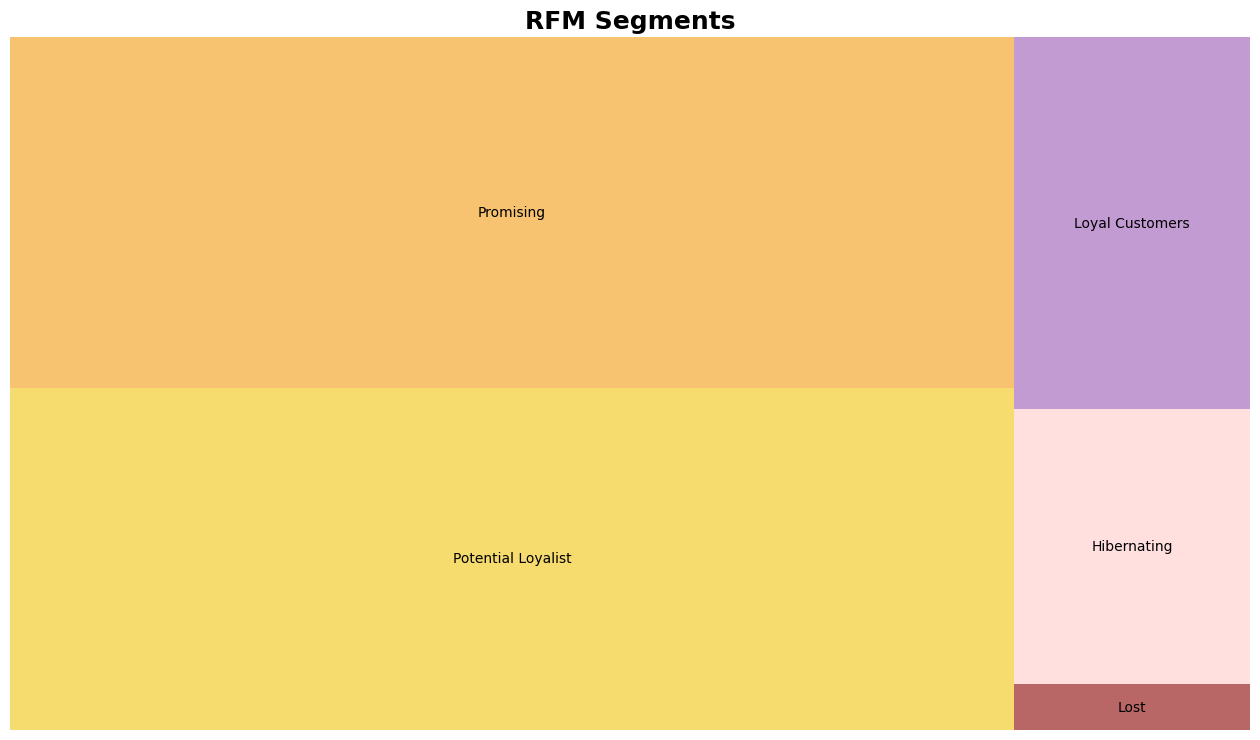

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
import squarify

fig, ax = plt.subplots(figsize=(16, 9))
subplot_kw=dict(aspect=1.156)
sizes = RFM_desc_pd['Count']
label=['Potential Loyalist','Promising','Lost','Hibernating', 'Loyal Customers' ]
colors = ['#F1C40F', '#F39C12', '#8b0000', '#FFCCCB', '#9B59B6']

# Plot treemap
squarify.plot(sizes=sizes, 
              label=label,
              color=colors,
              alpha=.6 )

plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()

RFM segmentation let us identify groups of clients who should be given extra attention and that marketers can target with communications that are far more relevant to their unique behaviors, resulting in improved response rates, enhanced loyalty, and increased customer lifetime value.
Now that we've identified our customer categories, we can decide how to approach or deal with each customer.

Now that we've identified our customer categories, we can decide how to approach or deal with each type of customer:


1. Potential Loyalist : Offer membership / loyalty program. Keep them engaged. Offer personalised recommendations.
2. Promising : Offer coupons. Bring them back to the platform and keep them engaged. Offer personalised recommendations.
3. About to Sleep : Win them back via renewals or newer products, don’t lose them to competition. Talk to them if necessary. Spend time on highest possible personalisation.
4. Can't Lose Them : Provide helpful resources on the site. Send personalised emails.
5. Hibernating : Make subject lines of emails very personalised. Revive their interest by a specific discount on a specific product.
6. Lost : Revive interest with reach out campaign. Ignore otherwise.



Customer Lifetime Value is the total amount of money customers are expected to spend with your business or on your products for as long as a customer or account remains your client. Here, the Customer Lifetime Value for the e-commerce website is yet to be provided.

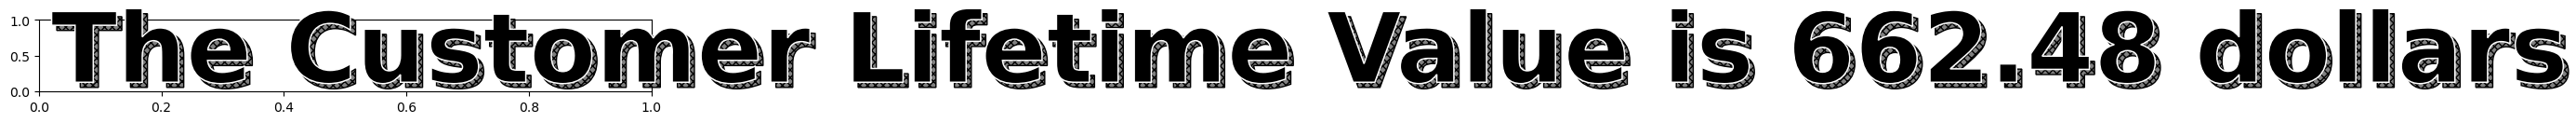

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects

# Customer Lifetime Value calculation
ecom_oct_purchase = ecom_oct.filter(ecom_oct.event_type == "purchase")
total_spent_per_user = (ecom_oct_purchase
                        .groupBy('user_id')
                        .agg(sum('price').alias('total_spent')))
total_spent_per_user_sorted = (total_spent_per_user
                               .orderBy('total_spent', ascending=False))
average_spent_per_user = (total_spent_per_user_sorted
                          .agg(sum('total_spent') / countDistinct('user_id'))
                          .first()[0])
output_text = f"The Customer Lifetime Value is {average_spent_per_user:.2f} dollars"

# Plotting the text
fig = plt.figure(figsize=(8.5, 1))
ax = fig.add_subplot(111)
t = ax.text(0.02, 0.5, output_text, fontsize=75, weight=1000, va='center')
t.set_path_effects([
    path_effects.PathPatchEffect(offset=(4, -4), hatch='xxxx', facecolor='gray'),
    path_effects.PathPatchEffect(edgecolor='white', linewidth=1.1, facecolor='black')])
#plt.show()


## 3.Machine Learning Model
In this section, we want to create a Supervised Machine Learning model to predict if a user who added an item to the cart will convert into a customer. We will create an RFormula, split the data into train and test, and finally run a Gradient Boosting Decision Trees Classifying model to get the most accurate predictions. We also created an ROC curve that shows an accuracy of about 57%. This number might not be higher due to a number of reasons, including class imbalance which we mitigated by pivoting our analysis to focus on the "add to cart" event type rather than the "view" event type.

In [ ]:
data = "gs://ecommerce-team-8/notebooks/jupyter/"

In [ ]:
from pyspark.sql.types import StructField, StructType, StringType, LongType, IntegerType
ecom_oct = spark.read.format("csv")\
  .option("inferSchema", "true")\
  .option("header", "true")\
  .option("nullValue", "NA")\
  .load(data + "e-commerce/2019-Oct.csv")


ecom_nov = spark.read.format("csv")\
  .option("inferSchema", "true")\
  .option("header", "true")\
  .option("nullValue", "NA")\
  .load(data + "e-commerce/2019-Nov.csv")

#ecom_oct.printSchema()

#merge two months data

ecom_oct = ecom_oct.unionAll(ecom_nov)

In [ ]:
ecom_oct=ecom_oct.cache()

In [ ]:
from pyspark.sql.functions import col

df_targets = ecom_oct.filter(col("event_type").isin(["cart", "purchase"])) \
              .dropDuplicates(["event_type", "product_id", "price", "user_id", "user_session"])


In [ ]:
from pyspark.sql.functions import when
df_targets = df_targets.withColumn("is_purchased", when(col("event_type") == "purchase", 1).otherwise(0))


In [ ]:
from pyspark.sql.functions import date_format

# Define the datetime pattern to use for formatting the date.
datetime_pattern = "E"

# Calculate the new column and keep both columns.
df_targets = df_targets.withColumn("event_weekday", date_format("event_time", datetime_pattern)) 
                       

# Show the resulting DataFrame.
df_targets.show(5)


+-------------------+----------+----------+-------------------+--------------------+-------+------+---------+--------------------+------------+-------------+
|         event_time|event_type|product_id|        category_id|       category_code|  brand| price|  user_id|        user_session|is_purchased|event_weekday|
+-------------------+----------+----------+-------------------+--------------------+-------+------+---------+--------------------+------------+-------------+
|2019-10-06 11:33:54|      cart|   1004870|2053013555631882655|electronics.smart...|samsung|289.52|546521725|00000083-8816-4d5...|           0|          Sun|
|2019-10-25 08:34:23|      cart|   1004834|2053013555631882655|electronics.smart...|samsung| 171.9|560486342|000001fd-1f89-45e...|           0|          Fri|
|2019-10-24 09:08:58|  purchase|   1004856|2053013555631882655|electronics.smart...|samsung|131.51|513622224|000081ea-9376-4eb...|           1|          Thu|
|2019-11-07 16:58:19|  purchase|  25400332|205301356

In [ ]:
df_targets = df_targets.withColumn("weekend_flag", when(col("event_weekday").isin(["Fri", "Sat", "Sun"]), 1).otherwise(0))


In [ ]:
df_targets.show(5)

+-------------------+----------+----------+-------------------+--------------------+-------+------+---------+--------------------+------------+-------------+------------+
|         event_time|event_type|product_id|        category_id|       category_code|  brand| price|  user_id|        user_session|is_purchased|event_weekday|weekend_flag|
+-------------------+----------+----------+-------------------+--------------------+-------+------+---------+--------------------+------------+-------------+------------+
|2019-10-06 11:33:54|      cart|   1004870|2053013555631882655|electronics.smart...|samsung|289.52|546521725|00000083-8816-4d5...|           0|          Sun|           1|
|2019-10-25 08:34:23|      cart|   1004834|2053013555631882655|electronics.smart...|samsung| 171.9|560486342|000001fd-1f89-45e...|           0|          Fri|           1|
|2019-10-24 09:08:58|  purchase|   1004856|2053013555631882655|electronics.smart...|samsung|131.51|513622224|000081ea-9376-4eb...|           1|  

In [ ]:
df_targets=df_targets.cache()

In [ ]:
from pyspark.sql.functions import split

df_targets = df_targets.withColumn("category_code_level1", split(col("category_code"), "\\.")[0].cast("string"))
df_targets = df_targets.withColumn("category_code_level2", split(col("category_code"), "\\.")[1].cast("string"))


In [ ]:
df_targets.show(5)

+-------------------+----------+----------+-------------------+--------------------+------------+------+---------+--------------------+------------+-------------+------------+--------------------+--------------------+
|         event_time|event_type|product_id|        category_id|       category_code|       brand| price|  user_id|        user_session|is_purchased|event_weekday|weekend_flag|category_code_level1|category_code_level2|
+-------------------+----------+----------+-------------------+--------------------+------------+------+---------+--------------------+------------+-------------+------------+--------------------+--------------------+
|2019-11-14 18:46:23|      cart|  11800010|2053013561243861733|                null|        null|  3.86|518288662|0003cbcd-b80e-447...|           0|          Thu|           0|                null|                null|
|2019-10-10 05:32:43|  purchase|   1004856|2053013555631882655|electronics.smart...|     samsung|130.47|553732780|0004723e-d736-

In [ ]:
df_targets = df_targets.dropna(how='any')

In [ ]:
df_targets.count()

3086658

Creating an RFormula to run the model:

In [ ]:
# Your answer goes here
from pyspark.ml.feature import RFormula

supervised = RFormula(formula="is_purchased ~ .-event_time-event_type-product_id-category_id-category_code-user_id-user_session-event_weekday")

In [ ]:
fittedRF = supervised.fit(df_targets)

In [ ]:
preparedDF = fittedRF.transform(df_targets)

In [ ]:
preparedDF.select('features','label').show(2, truncate=False)

+-------------------------------------------------------+-----+
|features                                               |label|
+-------------------------------------------------------+-----+
|(1631,[0,1560,1562,1574],[1.0,130.47,1.0,1.0])         |1.0  |
|(1631,[0,1560,1561,1562,1574],[1.0,131.53,1.0,1.0,1.0])|1.0  |
+-------------------------------------------------------+-----+
only showing top 2 rows



In [ ]:
import pandas as pd
featureCols = pd.DataFrame(preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["binary"]+
  preparedDF.schema["features"].metadata["ml_attr"]["attrs"]["numeric"]).sort_values("idx")

featureCols = featureCols.set_index('idx')
featureCols

,name
idx,
0,brand_samsung
1,brand_apple
2,brand_xiaomi
3,brand_huawei
4,brand_oppo
...,...
1626,category_code_level2_glove
1627,category_code_level2_scarf
1628,category_code_level2_sock


Splitting the dataset into train and test:

In [ ]:
train, test = preparedDF.randomSplit([0.7, 0.3], seed = 843)
test.show(2)

+-------------------+----------+----------+-------------------+--------------------+-----+-------+---------+--------------------+------------+-------------+------------+--------------------+--------------------+--------------------+-----+
|         event_time|event_type|product_id|        category_id|       category_code|brand|  price|  user_id|        user_session|is_purchased|event_weekday|weekend_flag|category_code_level1|category_code_level2|            features|label|
+-------------------+----------+----------+-------------------+--------------------+-----+-------+---------+--------------------+------------+-------------+------------+--------------------+--------------------+--------------------+-----+
|2019-10-01 03:18:16|      cart|   1005122|2053013555631882655|electronics.smart...|apple|1027.05|541496006|329aa20d-e7a3-4e0...|           0|          Tue|           0|         electronics|          smartphone|(1631,[1,1560,156...|  0.0|
|2019-10-01 03:23:29|  purchase|   6300739|2

We decided to train the model with a Gradient Boosting Decision Trees Classifying model to get the best accuracy in our prediction

In [ ]:
from pyspark.ml.classification import GBTClassifier

gbt = GBTClassifier()


In [ ]:
dtModel = gbt.fit(train)

Calculating feature importance:

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (8,6)

Text(0, 0.5, 'Feature Importances')

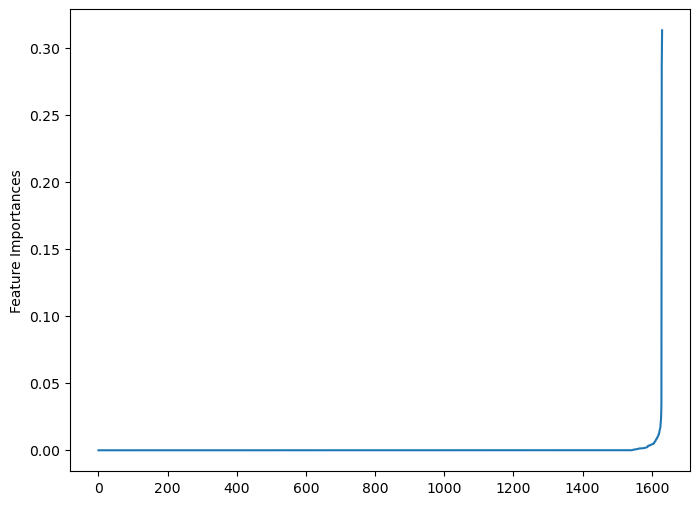

In [ ]:
# Your answer goes here
import numpy as np
beta = np.sort(dtModel.featureImportances)
plt.plot(beta)
plt.ylabel('Feature Importances')

In [ ]:
coefsArray = np.array(dtModel.featureImportances)  # convert to np.array
coefsDF = pd.DataFrame(coefsArray, columns=['coefs'])  # to pandas

coefsDF = coefsDF.merge(featureCols, left_index=True, right_index=True)  # join it with featureCols we created above
coefsDF.sort_values('coefs', inplace=True,ascending=False)  # Sort them
coefsDF

,coefs,name
1560,0.312837,price
1561,0.287375,weekend_flag
1,0.033696,brand_apple
1574,0.023767,category_code_level2_smartphone
0,0.020648,brand_samsung
...,...,...
579,0.000000,brand_tamish
578,0.000000,brand_huile
577,0.000000,brand_heyner
576,0.000000,brand_hasbro


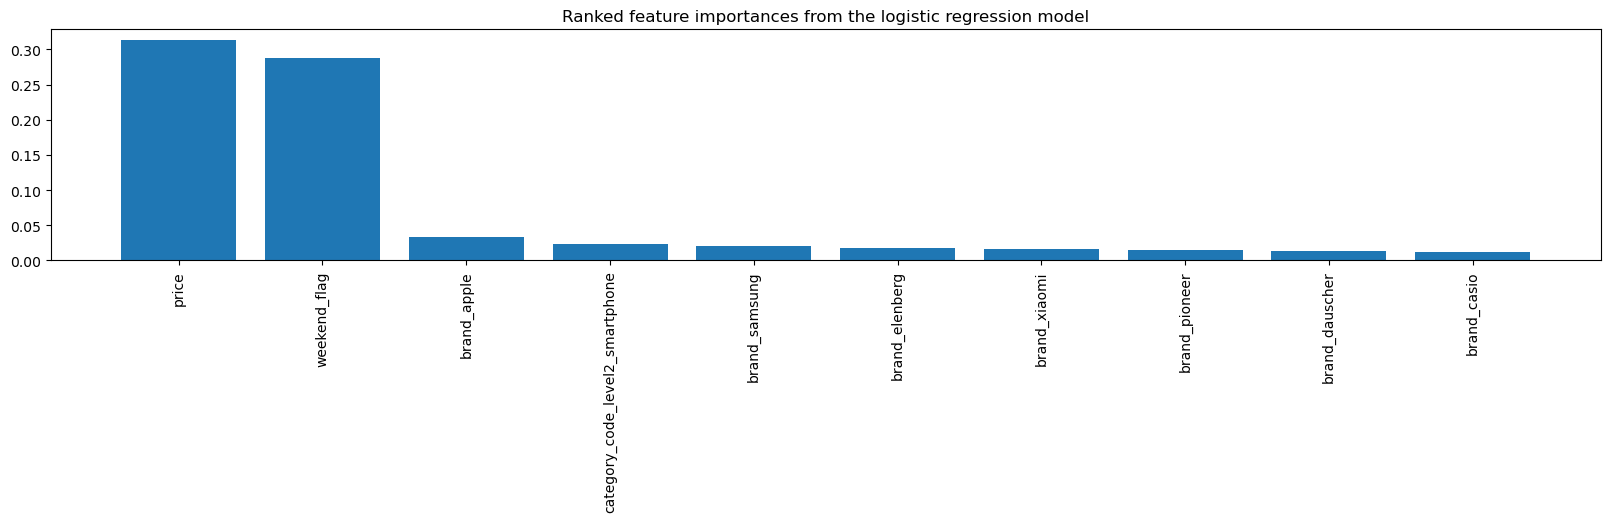

In [ ]:
plt.rcParams["figure.figsize"] = (20,3)
plt.xticks(rotation=90)
plt.bar(coefsDF.head(10).name, coefsDF.head(10).coefs)
plt.title('Ranked feature importances from the logistic regression model')
plt.xticks(rotation=90)
plt.show()

The chart above shows the top 10 most important features to our model, showing that price is very important. This could confirm our previous finding that the users are quiet price sensitive.

In [ ]:
test_trans = dtModel.transform(test)

In [ ]:
train_trans=dtModel.transform(train)

Calculating the accuracy of our train and test datasets:

In [ ]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(metricName='areaUnderROC')

gbt_accuracy_train = evaluator.evaluate(train_trans)
print("Accuracy of Gradient-Boosted Tree is = %g"%(gbt_accuracy_train))


Accuracy of Gradient-Boosted Tree is = 0.568438


In [ ]:
gbt_accuracy = evaluator.evaluate(test_trans)
print("Accuracy of Gradient-Boosted (Test) Tree is = %g"%(gbt_accuracy))


Accuracy of Gradient-Boosted (Test) Tree is = 0.567458


In [ ]:
from sklearn.metrics import auc, roc_curve
from matplotlib import pyplot as plt 

def plotRoc(data, model):
  pred_ = data
  pred_pd_ = pred_.select(['label', 'prediction', 'probability']).toPandas()

  pred_pd_['probability'] = pred_pd_['probability'].map(lambda x: list(x))
  pred_pd_['encoded_label'] = pred_pd_['label'].map(lambda x: np.eye(2)[int(x)])

  y_pred_ = np.array(pred_pd_['probability'].tolist())
  y_true_ = np.array(pred_pd_['encoded_label'].tolist())

  fpr_, tpr_, threshold_ = roc_curve(y_score=y_pred_[:,0], y_true=y_true_[:,0])
  auc_ = auc(fpr_, tpr_)

  plt.figure()
  plt.plot([0,1], [0,1], '--', color='orange')
  plt.plot(fpr_, tpr_, label='auc = {:.3f}'.format(auc_))
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='lower right')
  plt.grid()
  plt.show()

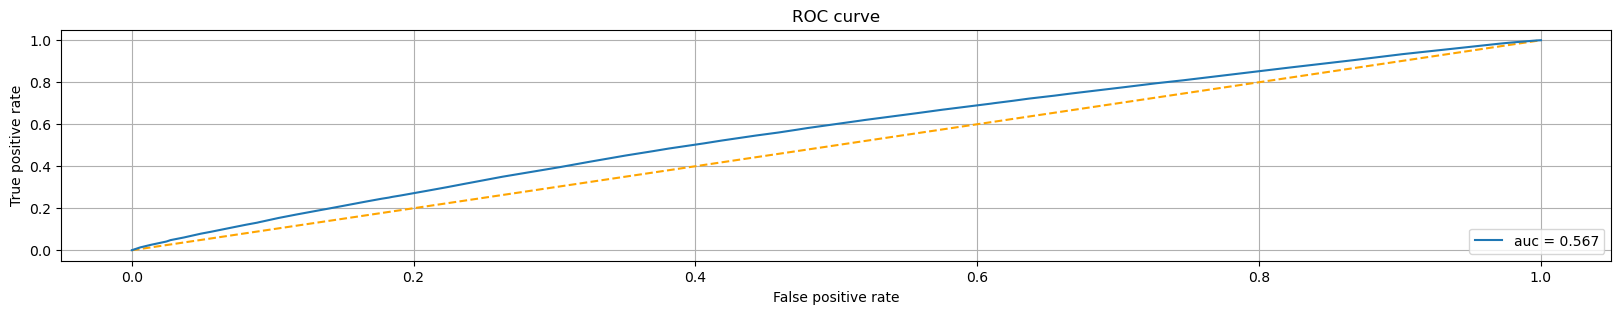

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 516, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/lib/spark/python/lib/py4j-0.10.9.5-src.zip/py4j/clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiving
/usr/lib/spark/python/pyspark/context.py:561: RuntimeWarning: Unable to cleanly shutdown Spark JVM process. It is possible that the process has crashed, been killed or may also be in a zombie state.
  warnings.warn(
ERROR:root:Exceptio

In [ ]:
plotRoc(test_trans, dtModel)

In the ROC curve above, we can see that the accuracy of our test model is about 57%.

## 4.Summary

### 4.1Conclusion

In pursuit of gaining a deeper understanding of distinct customer patterns and segments, this project aimed to provide critical metrics that can help the e-commerce website make informed business and marketing decisions. To accomplish this, we first analyzed customer behavior during different times of the day and measured the add-to-cart rate and cart abandonment rate based on the time session of the day. The analysis revealed that the most significant add-to-cart rate occurred between 9 am and noon, while most customers abandoned their carts from noon to 3 pm.


Subsequently, we conducted a comprehensive brand analysis that encompassed popularity, high gross profits, earnings per session, and brand engagement, enabling the e-commerce website to prioritize the promotion of high-performing brands on the landing page. This approach was aimed at increasing conversion rates and maximizing revenue.


In addition, we successfully segmented customers based on their recency, frequency, and monetary value, providing marketers with practical recommendations on how to optimally target different customer groups. Furthermore, we leveraged the power of machine learning by employing the Gradient Boosting Decision Trees Classifying model to predict customer purchase behavior accurately.
The results of these analyses provided critical insights into the e-commerce website's business operations, which can enable the organization to develop an extensive business plan aimed at increasing its return on investment (ROI).

### 4.2Future Scope

For future scope, we would ideally include more than one month data into our analysis to get more accurate and representative results. We also observed class imbalance between the types of activities which we would want to take into account when we do further analysis. With these changes, we will be running a more accurate machine learning model to predict at time of addition to shopping cart if user will purchase a given product or not. Finally, as a future exercise, we want to look deeper into add-to-cart rate and cart abandonment rate which could help us give more actionable insights.

### 4.3Challenges

This project was not without its challenges, the most notable being the imbalance in the dataset regarding the number of entries for customers who view the cart versus those who ultimately purchase the product. This imbalance posed a significant challenge for the accuracy of the Gradient Boosting Decision Trees Classifying model. To mitigate this challenge, we pivoted our analysis to focus on the "add to cart" event type rather than the "view" event type. Additionally, we increased the dataset's size by incorporating more data relating to the e-commerce website's operations for the month of November, on top of the existing data for October. These adjustments resulted in a marked improvement in the prediction accuracy of the model.


Another limitation we encountered during the project was our inability to conduct a granular product analysis due to a lack of detailed information on the product categories and their names. As a result, we were restricted to analyzing brands only. However, obtaining such data in the future could prove vital in making more informed business decisions at both the brand and product levels.

## 5.References

1. https://rees46.com/en/datasets
2. https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.legend.html
3. https://documentation.bloomreach.com/engagement/docs/rfm-segmentation
4. https://www.geeksforgeeks.org/treemaps-in-python-using-squarify/